In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'+'improved_ff_detsys/' 
output_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

plot_systematic = 0

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

FF = imp.load_source('FF_functions',lib_function_dir+'FF_functions.py')

Welcome to JupyROOT 6.18/04
N_tot =  4.10331109202e+31   flux=  1.58051463543e+11 for pot:  2.144e+20


In [2]:
outputdir_png, outputdir_root, outputdir_pdf = NuCC.prepareOutput2(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)

In [3]:
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kFALSE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [4]:
from array import array
#mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
#mom_bins = [ 0.00, 0.225, 0.28, 0.33, 0.39, 0.52, 0.78, 1.21, 2.5]

mom_bins = {}
#mom_bins.Append()
mom_bins[0] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[1] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[2] = [ 0.00, 0.18, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[3] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[4] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[5] = [ 0.00, 0.30, 0.45, 0.77, 2.50 ]
mom_bins[6] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]
mom_bins[7] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]
mom_bins[8] = [ 0.00, 0.30, 0.45, 0.77, 1.28, 2.50 ]

theta_bins = [ -1.00, -0.50, 0.00, 0.28, 0.47, 0.63, 0.765, 0.865, 0.935, 1.00 ]

len_theta = len(theta_bins) - 1
len_mom = {}
sum_bins = 0
for i in range(len_theta):
    len_mom[i] = len(mom_bins[i]) - 1
    #print len_mom[i]
    sum_bins+=len_mom[i]


In [5]:
NumberOfFiles = 5000
POT_file = 5e8
activeVol_Area = 128.175*2*116.5*2
pot_data = 2.144e+20

path = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/Flux/zarko/'
f_flux_int = ROOT.TFile.Open(path+"MCC9_FluxHist_volTPCActive.root", 'read')
h_flux_cv = f_flux_int.Get("hEnumu_cv")
flux_cv = h_flux_cv.Integral(-1,201)/(NumberOfFiles*POT_file*activeVol_Area)*pot_data

roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))

N_tot = roh_data*N_A*N_nucleons*V_fid/mol

print 'N_tot = ',N_tot,'  flux= ',flux_cv, 'for pot: ', pot_data

N_tot =  4.10331109202e+31   flux=  1.58051463543e+11 for pot:  2.144e+20


# prepare systematics

Make numpy files including the backbgrounds and smearing matices for the different systematics:
detector, genie_all, genie_other, flux

What is needed is per universe: background, smearing matrix


# Detector systematic

Detector systematic: 1 universe, 1 sigma
Effects: cv, dedx, LYatt, LYdown, LYray, recomb2, SCE, WireAngleXZ, WireAngleYZ, WireModX, WireModYZ

In [6]:
#store all histograms needed in one file: bkg, smearing, covariance
if(1):
    path_detsys = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'

    f_cv = ROOT.TFile.Open(path_detsys+'xsec_detsys_CV_2D_t/xsec_detsys_CV_2D.root', 'read')
    f_dedx = ROOT.TFile.Open(path_detsys+'xsec_detsys_dEdx_2D_t/xsec_detsys_dEdx_2D.root', 'read')
    f_LYatt = ROOT.TFile.Open(path_detsys+'xsec_detsys_LYAtt_2D_t/xsec_detsys_LYAtt_2D.root', 'read')
    f_LYdown = ROOT.TFile.Open(path_detsys+'xsec_detsys_LYdown_2D_t/xsec_detsys_LYdown_2D.root', 'read')
    f_LYray = ROOT.TFile.Open(path_detsys+'xsec_detsys_LYRay_2D_t/xsec_detsys_LYRayleigh_2D.root', 'read')
    f_recomb2 = ROOT.TFile.Open(path_detsys+'xsec_detsys_recomb2_2D_t/xsec_detsys_recomb2_2D.root', 'read')
    f_sce = ROOT.TFile.Open(path_detsys+'xsec_detsys_SCE_2D_t/xsec_detsys_SCE_2D.root', 'read')
    f_waxz = ROOT.TFile.Open(path_detsys+'xsec_detsys_WireAngleXZ_2D_t/xsec_detsys_WireAngleXZ_2D.root', 'read')
    f_wayz = ROOT.TFile.Open(path_detsys+'xsec_detsys_WireAngleYZ_2D_t/xsec_detsys_WireAngleYZ_2D.root', 'read')
    f_wmx = ROOT.TFile.Open(path_detsys+'xsec_detsys_WireModX_2D_t/xsec_detsys_WireModX_2D.root', 'read')
    f_wmyz = ROOT.TFile.Open(path_detsys+'xsec_detsys_WireModYZ_2D_t/xsec_detsys_WireModYZ_2D.root', 'read')

    f_all = ROOT.TFile.Open(path_detsys+'xsec_detsys_all_2D_t/Detector_systematic_2D.root', 'read')
    
    h_true_cv = f_cv.Get('h_gen_all')
    h_sel_cv = f_cv.Get('h_sel_all')

    h_ext_cv = f_cv.Get('h_ext_all')
    h_dirt_cv = f_cv.Get('h_dirt_all')


    h_bkg_cv = f_cv.Get('h_bkg_all')
    h_bkg_dedx = f_dedx.Get('h_bkg_all')
    h_bkg_LYatt = f_LYatt.Get('h_bkg_all')
    h_bkg_LYdown = f_LYdown.Get('h_bkg_all')
    h_bkg_LYray = f_LYray.Get('h_bkg_all')
    h_bkg_recomb2 = f_recomb2.Get('h_bkg_all')
    h_bkg_sce = f_sce.Get('h_bkg_all')
    h_bkg_waxz = f_waxz.Get('h_bkg_all')
    h_bkg_wayz = f_wayz.Get('h_bkg_all')
    h_bkg_wmx = f_wmx.Get('h_bkg_all')
    h_bkg_wmyz = f_wmyz.Get('h_bkg_all')

    h_smear_cv = f_cv.Get('h_smearing')
    h_smear_dedx = f_dedx.Get('h_smearing')
    h_smear_LYatt = f_LYatt.Get('h_smearing')
    h_smear_LYdown = f_LYdown.Get('h_smearing')
    h_smear_LYray = f_LYray.Get('h_smearing')
    h_smear_recomb2 = f_recomb2.Get('h_smearing')
    h_smear_sce = f_sce.Get('h_smearing')
    h_smear_waxz = f_waxz.Get('h_smearing')
    h_smear_wayz = f_wayz.Get('h_smearing')
    h_smear_wmx = f_wmx.Get('h_smearing')
    h_smear_wmyz = f_wmyz.Get('h_smearing')

    #save all whats needed
    RootFile = ROOT.TFile('/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff/'+"FF_detsys.root","RECREATE");
    #blbla.Write('dfdfs')
    h_true_cv.Write('h_true_cv')
    h_sel_cv.Write('h_sel_cv')
    
    h_ext_cv.Write('h_ext_cv')
    h_dirt_cv.Write('h_dirt_cv')

    h_bkg_cv.Write('h_bkg_cv')
    h_bkg_dedx.Write('h_bkg_dedx')
    h_bkg_LYatt.Write('h_bkg_LYatt')
    h_bkg_LYdown.Write('h_bkg_LYdown')
    h_bkg_LYray.Write('h_bkg_LYray')
    h_bkg_recomb2.Write('h_bkg_recomb2')
    h_bkg_sce.Write('h_bkg_sce')
    h_bkg_waxz.Write('h_bkg_waxz')
    h_bkg_wayz.Write('h_bkg_wayz')
    h_bkg_wmx.Write('h_bkg_wmx')
    h_bkg_wmyz.Write('h_bkg_wmyz')

    h_smear_cv.Write('h_smear_cv')
    h_smear_dedx.Write('h_smear_dedx')
    h_smear_LYatt.Write('h_smear_LYatt')
    h_smear_LYdown.Write('h_smear_LYdown')
    h_smear_LYray.Write('h_smear_LYray')
    h_smear_recomb2.Write('h_smear_recomb2')
    h_smear_sce.Write('h_smear_sce')
    h_smear_waxz.Write('h_smear_waxz')
    h_smear_wayz.Write('h_smear_wayz')
    h_smear_wmx.Write('h_smear_wmx')
    h_smear_wmyz.Write('h_smear_wmyz')

    RootFile.Close()

In [7]:
def smear_plot(h_true):
    if h_true.GetNbinsX() != 43:
        h_true_this = ROOT.TH1F('h_true_this',"h_true_this",43,0,43)
        for i in range(43):
            h_true_this.SetBinContent(i+1,h_true.GetBinContent(i+1))
    else:
        h_true_this = h_true.Clone()
    h_smear = f_cv.Get('h_smearing')
    smear_mat = FF.plot2arr(h_smear,2)
    eff_vec = FF.plot2arr(h_eff,1)
    true_vec = FF.plot2arr(h_true_this,1)
    smear_mat = smear_mat*eff_vec
    reco_vec = true_vec.dot(smear_mat)
    h_reco = FF.arr2plot(reco_vec)
    
    return h_reco

In [8]:
def return_detsys_covar(h_true,this_pot):
    #print 'go into function'
    #calculate the covariance for the the prediction
    path_this = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/My_Measurement/'
    f_this = ROOT.TFile.Open(path_this+'FF_detsys.root', 'read')
    para = ['dedx','LYatt','LYdown','LYray','recomb2','sce','waxz','wayz','wmx','wmyz']
    #print 'Opend file'
    h_true_cv = h_true.Clone()
    h_ext_cv = f_this.Get('h_ext_cv')
    h_dirt_cv = f_this.Get('h_dirt_cv')
    h_bkg_cv = f_this.Get('h_bkg_detcv')
    #h_ext_cv.Scale(this_pot/9.457e+18)
    h_dirt_cv.Scale(this_pot/9.457e+18)
    #h_bkg_cv.Scale(this_pot/9.457e+18)
    h_smear_cv = f_this.Get('h_smear_detcv')
    num_bins = h_smear_cv.GetNbinsX()
    smear_mat = np.zeros((num_bins,num_bins))
    true_vec = np.zeros((num_bins))
    bkg_vec = np.zeros((num_bins))
    ext_vec = np.zeros((num_bins))
    dirt_vec = np.zeros((num_bins))

    for i in range(num_bins):
        true_vec[i] = h_true_cv.GetBinContent(i+1)
        bkg_vec[i] = h_bkg_cv.GetBinContent(i+1)
        ext_vec[i] = h_ext_cv.GetBinContent(i+1)
        dirt_vec[i] = h_dirt_cv.GetBinContent(i+1)
        for j in range(num_bins):
            smear_mat[i][j]= h_smear_cv.GetBinContent(i+1,j+1)
    #print 'filled vecotrs'
    reco_vec = true_vec.dot(smear_mat)

    bkg_vec_det = np.zeros((len(para),num_bins))
    reco_vec_det = np.zeros((len(para),num_bins))
    smear_mat_det = np.zeros((len(para),num_bins,num_bins))

    #sig_vec_det = np.zeros((len(para),num_bins)) # signal + bkg prediction
    res_vec_det = np.zeros((len(para),num_bins)) # residual
    res_vec = np.zeros((num_bins)) # quadratic sum


    h_bkg_det = []
    h_smear_det = []
    #print 'go into loop'
    for i,x in enumerate(para):
        h_bkg_det.append(f_this.Get('h_bkg_'+x))
        h_bkg_det[i].Scale(this_pot/9.457e18)
        h_smear_det.append(f_this.Get('h_smear_'+x))
        for j in range(num_bins):
            bkg_vec_det[i][j] = h_bkg_det[i].GetBinContent(j+1)
            for k in range(num_bins):
                smear_mat_det[i][j][k] = h_smear_det[i].GetBinContent(j+1,k+1)
        reco_vec_det[i]= true_vec.dot(smear_mat_det[i])
        #print reco_vec[1]+bkg_vec[1], reco_vec_det[i][1] + bkg_vec_det[i][1]
        res_vec_det[i] = ((reco_vec+bkg_vec) - (reco_vec_det[i] + bkg_vec_det[i]))/(reco_vec+bkg_vec+ext_vec+dirt_vec)

        for j in range(num_bins):
            res_vec[j] += res_vec_det[i][j]*res_vec_det[i][j]

    frac_covar_det = np.zeros((num_bins,num_bins))
    for i,x in enumerate(para):
        for j in range(num_bins):
            for k in range(num_bins):
                frac_covar_det[j][k] += res_vec_det[i][j] * res_vec_det[i][k]

    return frac_covar_det

In [9]:
def return_other_covar(h_true,this_pot):
    weight_list = [ 'AxFFCCQEshape_UBGenie' , 'DecayAngMEC_UBGenie', 'NormCCCOH_UBGenie', 'NormNCCOH_UBGenie',\
                   'RPA_CCQE_Reduced_UBGenie','RPA_CCQE_UBGenie','ThetaDelta2NRad_UBGenie','Theta_Delta2Npi_UBGenie',\
                    'VecFFCCQEshape_UBGenie','XSecShape_CCMEC_UBGenie']
    w_list = [0,1,2,3,4,5,6,7,8,9]
    
    path_other = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/pc46_data/'
    f_other = ROOT.TFile.Open(path_other+'Other_Genie_2D.root', 'read')

    h_true_cv = h_true.Clone()
    num_bins = h_true_cv.GetNbinsX()
    frac_covar = np.zeros((num_bins,num_bins))
    for w in w_list:
        #take first uiverse as cv
        h_bkg_cv = f_other.Get('h_bkg_all['+str(w)+'][0]')
        h_bkg_cv.Scale(this_pot/7.644e+18)
        h_smear_cv = f_other.Get('h_smearing['+str(w)+'][0]')
        h_eff_cv = f_other.Get('h_eff_all['+str(w)+'][0]')
        h_eff_cv.SetBinContent(5,1)
        h_eff_cv.SetBinContent(10,1)

        h_bkg_1 = f_other.Get('h_bkg_all['+str(w)+'][1]')
        h_bkg_1.Scale(this_pot/7.644e+18)
        h_smear_1 = f_other.Get('h_smearing['+str(w)+'][1]')
        h_eff_1 = f_other.Get('h_eff_all['+str(w)+'][1]')
        h_eff_1.SetBinContent(5,1)
        h_eff_1.SetBinContent(10,1)

        smear_mat = np.zeros((num_bins,num_bins))
        true_vec = np.zeros((num_bins))
        bkg_vec = np.zeros((num_bins))

        smear_mat1 = np.zeros((num_bins,num_bins))
        bkg_vec1 = np.zeros((num_bins))

        for i in range(num_bins):
            true_vec[i] = h_true_cv.GetBinContent(i+1)
            bkg_vec[i] = h_bkg_cv.GetBinContent(i+1)

            bkg_vec1[i] = h_bkg_1.GetBinContent(i+1)
            for j in range(num_bins):
                smear_mat[i][j]= h_smear_cv.GetBinContent(i+1,j+1)*h_eff_cv.GetBinContent(j+1)
                smear_mat1[i][j]= h_smear_1.GetBinContent(i+1,j+1)*h_eff_1.GetBinContent(j+1)

        reco_vec = true_vec.dot(smear_mat)
        reco_vec1 = true_vec.dot(smear_mat1)

        res_vec_other = ((reco_vec+bkg_vec) - (reco_vec1 + bkg_vec1))/(reco_vec+bkg_vec)
        frac_covar_other = np.zeros((num_bins,num_bins))
        for j in range(num_bins):
            for k in range(num_bins):
                frac_covar_other[j][k] += res_vec_other[j] * res_vec_other[k]

        frac_covar += frac_covar_other
    return frac_covar


In [10]:
def return_all_covar(h_true,this_pot):
    path_all = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/pc46_data/'
    f_all = ROOT.TFile.Open(path_all+'All_Genie_2D.root', 'read')
    
    h_true_cv = h_true.Clone()
    h_bkg_cv = f_all.Get('h_bkg_all[0]')
    bin_counter=0
    for t_bin in range(len_theta): #len_theta
        h_temp = f_all.Get('h_overlay_cv['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            h_bkg_cv.SetBinContent(bin_counter,h_temp.GetBinContent(m_bin+1))

    h_bkg_cv.Scale(this_pot/7.644e+18)
    h_smear_cv = f_all.Get('h_smearing_cv')
    h_eff_cv = f_all.Get('h_eff_all_cv')
    h_eff_cv.SetBinContent(5,1)
    h_eff_cv.SetBinContent(10,1)

    num_bins = h_smear_cv.GetNbinsX()
    smear_mat = np.zeros((num_bins,num_bins))
    true_vec = np.zeros((num_bins))
    bkg_vec = np.zeros((num_bins))

    for i in range(num_bins):
        true_vec[i] = h_true_cv.GetBinContent(i+1)
        bkg_vec[i] = h_bkg_cv.GetBinContent(i+1)
        for j in range(num_bins):
            smear_mat[i][j]= h_smear_cv.GetBinContent(i+1,j+1)*h_eff_cv.GetBinContent(j+1)

    reco_vec = true_vec.dot(smear_mat)
    
    num_universe = 100

    bkg_vec_all = np.zeros((num_universe,num_bins))
    reco_vec_all = np.zeros((num_universe,num_bins))
    smear_mat_all = np.zeros((num_universe,num_bins,num_bins))

    res_vec_all = np.zeros((num_universe,num_bins))

    h_bkg_all = []
    h_smear_all = []
    h_eff_all = []
    for uni in range(num_universe):
        #do something
        h_bkg_all.append(f_all.Get('h_bkg_all['+str(0)+']'))
        bin_counter = 0
        for t_bin in range(len_theta): #len_theta
            h_temp = f_all.Get('h_overlay['+str(uni)+']['+str(t_bin)+']')
            for m_bin in range(len_mom[t_bin]):
                bin_counter+=1
                h_bkg_all[uni].SetBinContent(bin_counter,h_temp.GetBinContent(m_bin+1))
            del h_temp

        h_bkg_all[uni].Scale(this_pot/7.644e+18)
        h_smear_all.append(f_all.Get('h_smearing['+str(uni)+']'))
        h_eff_all.append(f_all.Get('h_eff_all['+str(uni)+']'))
        h_eff_all[uni].SetBinContent(5,1)
        h_eff_all[uni].SetBinContent(10,1)

        for j in range(num_bins):
            bkg_vec_all[uni][j] = h_bkg_all[uni].GetBinContent(j+1)
            for k in range(num_bins):
                smear_mat_all[uni][j][k] = h_smear_all[uni].GetBinContent(j+1,k+1)*h_eff_all[uni].GetBinContent(k+1)
        reco_vec_all[uni]= true_vec.dot(smear_mat_all[uni])
        res_vec_all[uni] = ((reco_vec+bkg_vec) - (reco_vec_all[uni] + bkg_vec_all[uni]))/(reco_vec+bkg_vec)

    frac_covar_all = np.zeros((num_bins,num_bins))
    for uni in range(num_universe):
        for j in range(num_bins):
            for k in range(num_bins):
                frac_covar_all[j][k] += res_vec_all[uni][j] * res_vec_all[uni][k]
    frac_covar_all = frac_covar_all/num_universe
    
    del h_bkg_all
    del h_smear_all
    del h_eff_all
    
    return frac_covar_all

In [11]:
def return_flux_covar(h_true,this_pot):
    # give h_true_cv and POT since bkg is for specific POT
    # BACKGROUND, EFFICIENCY ARE IN ONE FILE, SMEARING IN OTHER...
    path = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/Flux/zarko/'
    path_flux = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/pc46_data/'

    #weight_list = [ 'expskin_FluxUnisim', 'horncurrent_FluxUnisim' ]
    weight_list = [ 'expskin_FluxUnisim', 'horncurrent_FluxUnisim', 'kminus_PrimaryHadronNormalization', 'kplus_PrimaryHadronFeynmanScaling',\
        'kzero_PrimaryHadronSanfordWang', 'nucleoninexsec_FluxUnisim', 'nucleonqexsec_FluxUnisim', 'nucleontotxsec_FluxUnisim',\
        'piminus_PrimaryHadronSWCentralSplineVariation', 'pioninexsec_FluxUnisim', 'pionqexsec_FluxUnisim', 'piontotxsec_FluxUnisim',\
        'piplus_PrimaryHadronSWCentralSplineVariation' ]

    f_flux_int = ROOT.TFile.Open(path+"MCC9_FluxHist_volTPCActive.root", 'read')

    f_flux_smear = []
    f_flux_bkg = []
    for i,x in enumerate(weight_list):
        f_flux_smear.append(ROOT.TFile.Open(path_flux+'xsec_2d_flux/root_output/'+x+'_Flux_systematic.root', 'read'))
        f_flux_bkg.append(ROOT.TFile.Open(path_flux+'xsec_2d_flux_rest/root_output/'+x+'_Flux_systematic_rest.root', 'read'))

    h_true_cv = h_true.Clone()
    h_bkg_cv = f_flux_bkg[0].Get('h_bkg_all[0][0]')
    bin_counter=0
    for t_bin in range(len_theta): #len_theta
        h_temp = f_flux_bkg[0].Get('h_overlay_cv['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            h_bkg_cv.SetBinContent(bin_counter,h_temp.GetBinContent(m_bin+1))

    NumberOfFiles = 5000
    POT_file = 5e8
    activeVol_Area = 128.175*2*116.5*2
    h_flux_cv = f_flux_int.Get("hEnumu_cv")
    flux_cv = h_flux_cv.Integral(-1,201)/(NumberOfFiles*POT_file*activeVol_Area)*this_pot

    h_bkg_cv.Scale(this_pot/7.644e+18)
    h_smear_cv = f_flux_smear[0].Get('h_smearing_cv')
    h_eff_cv = f_flux_bkg[0].Get('h_eff_all_cv')
    h_eff_cv.SetBinContent(5,1)
    h_eff_cv.SetBinContent(10,1)

    num_bins = h_smear_cv.GetNbinsX()
    smear_mat = np.zeros((num_bins,num_bins))
    true_vec = np.zeros((num_bins))
    bkg_vec = np.zeros((num_bins))

    for i in range(num_bins):
        true_vec[i] = h_true_cv.GetBinContent(i+1)
        bkg_vec[i] = h_bkg_cv.GetBinContent(i+1)
        for j in range(num_bins):
            smear_mat[i][j]= h_smear_cv.GetBinContent(i+1,j+1)*h_eff_cv.GetBinContent(j+1)

    reco_vec = true_vec.dot(smear_mat)

    num_universe = 100

    bkg_vec_flux = np.zeros((len(weight_list),num_universe,num_bins))
    reco_vec_flux = np.zeros((len(weight_list),num_universe,num_bins))
    smear_mat_flux = np.zeros((len(weight_list),num_universe,num_bins,num_bins))

    res_vec_flux = np.zeros((len(weight_list),num_universe,num_bins))
    h_bkg_flux = []
    h_smear_flux = []
    h_eff_flux = []
    for i,x in enumerate(weight_list):
        h_bkg_flux.append([])
        h_smear_flux.append([])
        h_eff_flux.append([])
        for uni in range(num_universe):
            #do something
            h_bkg_flux[i].append(f_flux_bkg[i].Get('h_bkg_all[0]['+str(uni)+']'))
            bin_counter = 0
            for t_bin in range(len_theta): #len_theta
                h_temp = f_flux_bkg[i].Get('h_overlay[0]['+str(uni)+']['+str(t_bin)+']')
                for m_bin in range(len_mom[t_bin]):
                    bin_counter+=1
                    h_bkg_flux[i][uni].SetBinContent(bin_counter,h_temp.GetBinContent(m_bin+1))
                del h_temp
            
            h_bkg_flux[i][uni].Scale(this_pot/7.644e+18)
            h_smear_flux[i].append(f_flux_smear[i].Get('h_smearing[0]['+str(uni)+']'))
            h_eff_flux[i].append(f_flux_bkg[i].Get('h_eff_all[0]['+str(uni)+']'))
            h_eff_flux[i][uni].SetBinContent(5,1)
            h_eff_flux[i][uni].SetBinContent(10,1)

            h_flux_var = f_flux_int.Get('numu_ms_'+x+'/hEnumu_'+x+'_ms_'+str(uni))
            flux_var = h_flux_var.Integral(-1,201)/(NumberOfFiles*POT_file*activeVol_Area)*this_pot
            #print flux_cv, flux_var, (flux_var-flux_cv)/flux_var 
            for j in range(num_bins):
                bkg_vec_flux[i][uni][j] = h_bkg_flux[i][uni].GetBinContent(j+1)
                for k in range(num_bins):
                    smear_mat_flux[i][uni][j][k] = h_smear_flux[i][uni].GetBinContent(j+1,k+1)*h_eff_flux[i][uni].GetBinContent(k+1)
            reco_vec_flux[i][uni]= true_vec.dot(smear_mat_flux[i][uni])
            res_vec_flux[i][uni] = ((reco_vec+bkg_vec)/flux_cv - (reco_vec_flux[i][uni] + bkg_vec_flux[i][uni])/flux_var)/((reco_vec+bkg_vec)/flux_cv)
    #print bkg_vec[1], bkg_vec_flux[i][uni][1]
    #print reco_vec[1], reco_vec_flux[i][uni][1]
    frac_covar_flux_vec = np.zeros((len(weight_list),num_bins,num_bins))
    for i,x in enumerate(weight_list):
        for uni in range(num_universe):
            for j in range(num_bins):
                for k in range(num_bins):
                    frac_covar_flux_vec[i][j][k] += res_vec_flux[i][uni][j] * res_vec_flux[i][uni][k]
        frac_covar_flux_vec[i] = frac_covar_flux_vec[i]/num_universe

    frac_covar_flux = np.zeros((num_bins,num_bins))
    for i,x in enumerate(weight_list):
        frac_covar_flux += frac_covar_flux_vec[i]
    return frac_covar_flux



In [12]:
def return_crt_covar(h_true,this_pot):
    #print 'go into function'
    #calculate the covariance for the the prediction
    path_crt = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
    f_crt = ROOT.TFile.Open(path_detsys+'xsec_2D_Run3_wighted_t.root', 'read')
    #print 'Opend file'
    h_true_cv = h_true.Clone()
    h_bkg_cv = h_true.Clone()
    h_bkg_crt = h_true.Clone()
    
    h_dirt_cv = h_true.Clone()
    h_dirt_crt = h_true.Clone()

    h_ext = h_true.Clone()

    bin_counter=0
    for t_bin in range(len_theta): #len_theta
        h_temp = f_crt.Get('h_overlay['+str(t_bin)+']')
        h_temp1 = f_crt.Get('h_overlay_nocrt['+str(t_bin)+']')
        h_temp2 = f_crt.Get('h_dirt['+str(t_bin)+']')
        h_temp3 = f_crt.Get('h_dirt_nocrt['+str(t_bin)+']')
        h_temp4 = f_crt.Get('h_ext['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            h_bkg_cv.SetBinContent(bin_counter,h_temp.GetBinContent(m_bin+1))
            h_bkg_crt.SetBinContent(bin_counter,h_temp1.GetBinContent(m_bin+1))
            h_dirt_cv.SetBinContent(bin_counter,h_temp2.GetBinContent(m_bin+1))
            h_dirt_crt.SetBinContent(bin_counter,h_temp3.GetBinContent(m_bin+1))
            h_ext.SetBinContent(bin_counter,h_temp4.GetBinContent(m_bin+1))
    
    h_bkg_cv.Scale(this_pot/2.144e+20)
    h_bkg_crt.Scale(this_pot/2.144e+20)
    h_dirt_cv.Scale(this_pot/2.144e+20)
    h_dirt_crt.Scale(this_pot/2.144e+20)
    h_ext.Scale(this_pot/2.144e+20)
    
    h_smear_cv = f_crt.Get('h_smearing')
    h_smear_crt = f_crt.Get('h_smearing_nocrt')
    
    num_bins = h_smear_cv.GetNbinsX()
    smear_mat = np.zeros((num_bins,num_bins))
    smear_mat_crt = np.zeros((num_bins,num_bins))
    true_vec = np.zeros((num_bins))
    bkg_vec = np.zeros((num_bins))
    dirt_vec = np.zeros((num_bins))
    ext_vec = np.zeros((num_bins))
    
    bkg_vec_crt = np.zeros((num_bins))
    dirt_vec_crt = np.zeros((num_bins))

    for i in range(num_bins):
        true_vec[i] = h_true_cv.GetBinContent(i+1)
        bkg_vec[i] = h_bkg_cv.GetBinContent(i+1)
        dirt_vec[i] = h_dirt_cv.GetBinContent(i+1)
        ext_vec[i] = h_ext.GetBinContent(i+1)

        bkg_vec_crt[i] = h_bkg_crt.GetBinContent(i+1)
        dirt_vec_crt[i] = h_dirt_crt.GetBinContent(i+1)
        for j in range(num_bins):
            smear_mat[i][j]= h_smear_cv.GetBinContent(i+1,j+1)
            smear_mat_crt[i][j]= h_smear_crt.GetBinContent(i+1,j+1)
    #print 'filled vecotrs'
    reco_vec = true_vec.dot(smear_mat)
    reco_vec_crt = true_vec.dot(smear_mat_crt)
    
    #bkg_vec_det = bkg_vec - bkg_vec_crt*0.1
    #dirt_vec_det = dirt_vec - dirt_vec_crt*0.1
    #reco_vec_det = reco_vec - reco_vec_crt*0.1
    delta = bkg_vec+dirt_vec+reco_vec - (bkg_vec_crt+dirt_vec_crt+reco_vec_crt)
    
    delta = delta*0.1
    tot = bkg_vec+dirt_vec+reco_vec+ext_vec
    
    frac_covar_det = np.zeros((num_bins,num_bins))
    for i in range(num_bins):
        for j in range(num_bins):
            frac_covar_det[i][j] = (delta[i]*delta[j])/(tot[i]*tot[j])
            
    return frac_covar_det

In [13]:
def return_stat_covar(h_histo):
    n_bins = h_histo.GetNbinsX()
    frac_covar_stat = np.zeros((n_bins,n_bins))
    if n_bins == 43:
        n_bins-=1
    for i in range(n_bins):
        #err = h_histo.GetBinError(i+1)
        val = h_histo.GetBinContent(i+1)
        #print err ,val
        frac_covar_stat[i][i] = 1.0 / (val)
    
    
    return frac_covar_stat

In [14]:
def return_dirt_covar(h_true, h_bkg, h_ext, h_dirt):
    n_bins = h_true.GetNbinsX()
    frac_covar_dirt = np.zeros((n_bins,n_bins))
    
    h_all = h_true.Clone()
    h_all = smear_plot(h_all)
    h_all.Add(h_bkg)
    h_all.Add(h_ext)
    h_all.Add(h_dirt)
    
    all_vec = FF.plot2arr(h_all,1)
    dirt_vec = FF.plot2arr(h_dirt,1)
    
    if n_bins == 43:
        n_bins-=1
    for i in range(n_bins):
        for j in range(n_bins):
            #print all_vec[i], dirt_vec[i]
            frac_covar_dirt[i][i] = (dirt_vec[i])*(dirt_vec[j])/(all_vec[i]*all_vec[j])
    
    
    return frac_covar_dirt

In [15]:
path_detsys = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
f_cv = ROOT.TFile.Open(path_detsys+'xsec_2D_Run3_wighted.root', 'read')
pot = 2.144e+20
h_true = ROOT.TH1F('h_true',"true tune3",43,0,43)
h_data = ROOT.TH1F('h_data',"data",43,0,43)
h_bkg = ROOT.TH1F('h_bkg',"Background",43,0,43)
h_ext = ROOT.TH1F('h_ext',"Cosmic",43,0,43)
h_dirt = ROOT.TH1F('h_dirt',"Cosmic",43,0,43)
h_eff = ROOT.TH1F('h_eff',"Cosmic",43,0,43)
bin_counter = 0
for t_bin in range(len_theta): #len_theta
    h_temp = f_cv.Get('h_true['+str(t_bin)+']')
    h_temp2 = f_cv.Get('h_data['+str(t_bin)+']')
    h_temp3 = f_cv.Get('h_overlay['+str(t_bin)+']')
    h_temp4 = f_cv.Get('h_ext['+str(t_bin)+']')
    h_temp5 = f_cv.Get('h_dirt['+str(t_bin)+']')
    h_temp6 = f_cv.Get('h_1d_eff['+str(t_bin)+']')
    for m_bin in range(len_mom[t_bin]):
        bin_counter+=1
        h_true.SetBinContent(bin_counter,h_temp.GetBinContent(m_bin+1))
        h_data.SetBinContent(bin_counter,h_temp2.GetBinContent(m_bin+1))
        h_bkg.SetBinContent(bin_counter,h_temp3.GetBinContent(m_bin+1))
        h_ext.SetBinContent(bin_counter,h_temp4.GetBinContent(m_bin+1))
        h_dirt.SetBinContent(bin_counter,h_temp5.GetBinContent(m_bin+1))
        h_eff.SetBinContent(bin_counter,h_temp6.GetBinContent(m_bin+1))
h_eff.SetBinContent(5,1)
h_eff.SetBinContent(10,1)

In [16]:
'''this_pot = 9.457e+18 #2.144e+20 # 9.457e+18
pot = this_pot
#print 'go into function'
#calculate the covariance for the the prediction
path_detsys = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff/'
f_det = ROOT.TFile.Open(path_detsys+'FF_detsys.root', 'read')
para = ['dedx','LYatt','LYdown','LYray','recomb2','sce','waxz','wayz','wmx','wmyz']
#print 'Opend file'
#h_true_cv = h_true.Clone()
h_true = f_det.Get('h_true_cv')
h_true.Scale(this_pot/1.19653398031e+20)
#h_bkg_cv = f_det.Get('h_bkg_cv')
#h_bkg_cv.Scale(this_pot/9.457e+18)
h_ext = f_det.Get('h_ext_cv')
h_dirt = f_det.Get('h_dirt_cv')
h_bkg = f_det.Get('h_bkg_cv')
h_ext.Scale(this_pot/9.457e+18)
h_dirt.Scale(this_pot/9.457e+18)
h_bkg.Scale(this_pot/9.457e+18)

h_smear_cv = f_det.Get('h_smear_cv')'''

"this_pot = 9.457e+18 #2.144e+20 # 9.457e+18\npot = this_pot\n#print 'go into function'\n#calculate the covariance for the the prediction\npath_detsys = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff/'\nf_det = ROOT.TFile.Open(path_detsys+'FF_detsys.root', 'read')\npara = ['dedx','LYatt','LYdown','LYray','recomb2','sce','waxz','wayz','wmx','wmyz']\n#print 'Opend file'\n#h_true_cv = h_true.Clone()\nh_true = f_det.Get('h_true_cv')\nh_true.Scale(this_pot/1.19653398031e+20)\n#h_bkg_cv = f_det.Get('h_bkg_cv')\n#h_bkg_cv.Scale(this_pot/9.457e+18)\nh_ext = f_det.Get('h_ext_cv')\nh_dirt = f_det.Get('h_dirt_cv')\nh_bkg = f_det.Get('h_bkg_cv')\nh_ext.Scale(this_pot/9.457e+18)\nh_dirt.Scale(this_pot/9.457e+18)\nh_bkg.Scale(this_pot/9.457e+18)\n\nh_smear_cv = f_det.Get('h_smear_cv')"

In [17]:
#fac=1000
#h_true.Scale(1.0/fac)
#pot = pot/fac

#frac_det = return_detsys_covar(h_true,pot)
#np.save(outputdir+'frac_det',frac_det)

frac_det = np.load('/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/My_Measurement/plots/'+'frac_det.npy')


In [18]:
#frac_det = np.load(outputdir+'frac_det.npy')
#frac_other = np.load(outputdir+'frac_other.npy')
#frac_all = np.load(outputdir+'frac_all.npy')
#frac_flux = np.load(outputdir+'frac_flux.npy')

frac_tot = frac_det #+frac_other+frac_all+frac_flux

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff_detsys/png/frac_err_detsys.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff_detsys/pdf/frac_err_detsys.pdf has been created


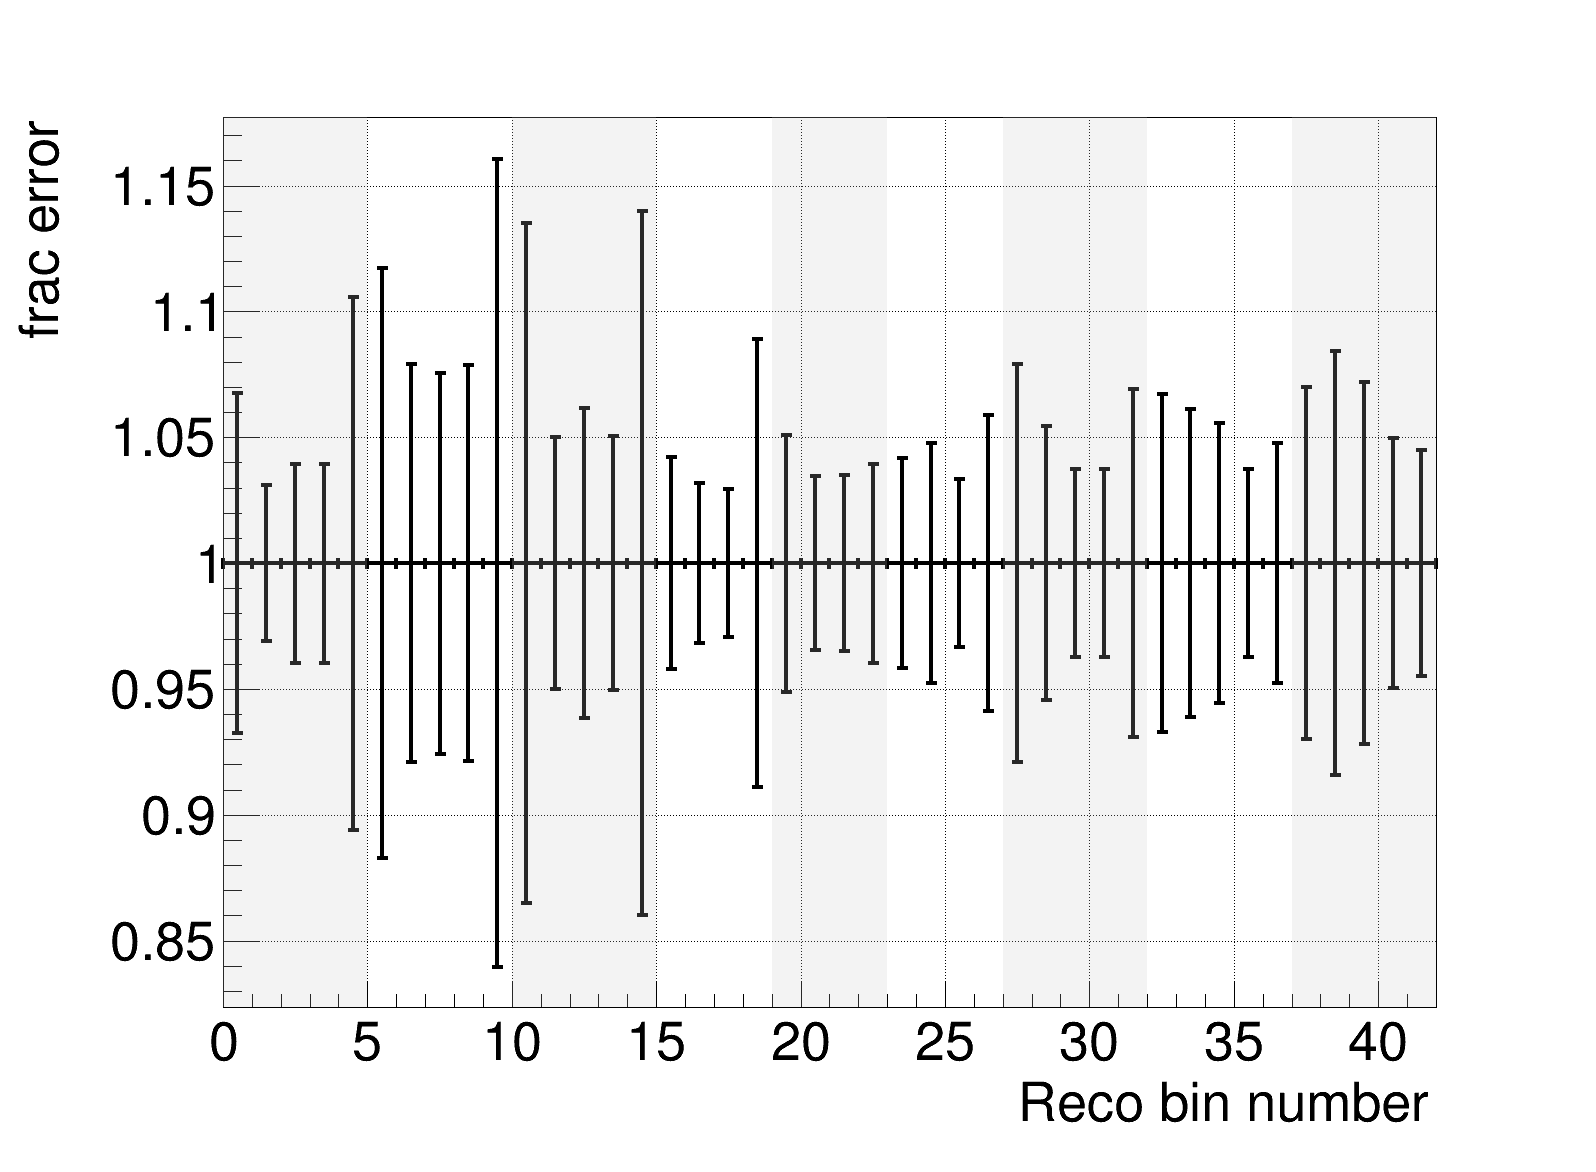

In [19]:
err = np.zeros((43))
for i in range(43):
    err[i] = math.sqrt(frac_tot[i][i])
h_err = FF.plot_err_array(err)
h_histo = FF.histBkg(h_err)
h_err.Draw('E1')
h_histo.Draw('hist same')
c1.Draw()
c1.SaveAs(outputdir_png + 'frac_err_detsys'+".png")
#c1.SaveAs(outputdir_root + 'frac_err_detsys'+".root")
c1.SaveAs(outputdir_pdf + 'frac_err_detsys'+".pdf")

Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).


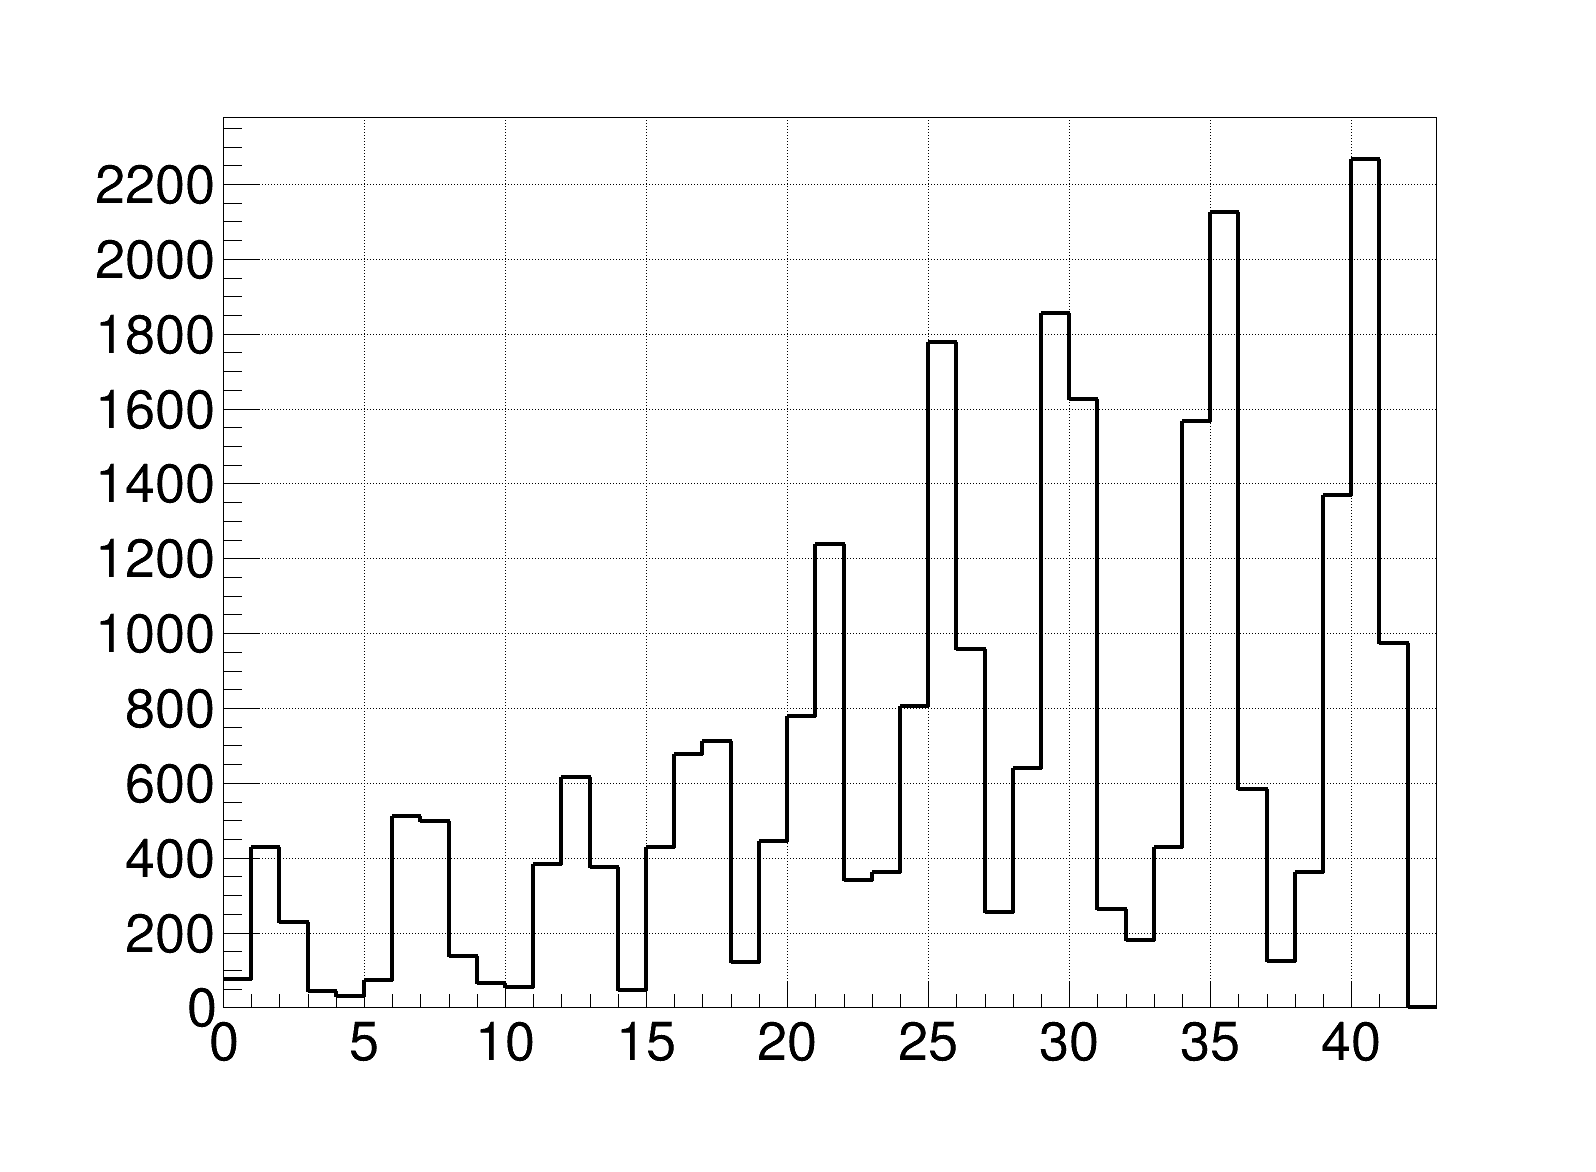

In [20]:
#smear true:
h_smear = f_cv.Get('h_smearing')
smear_mat = FF.plot2arr(h_smear,2)
eff_vec = FF.plot2arr(h_eff,1)
true_vec = FF.plot2arr(h_true,1)
#eff2 = eff_vec.T
smear_mat = smear_mat*eff_vec
reco_vec = true_vec.dot(smear_mat)
ROOT.gStyle.SetPaintTextFormat('0.1f')
h_reco = FF.arr2plot(reco_vec)
#h_reco.Scale(10)
h_reco.Draw('colz')
c1.Draw()

Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff_detsys/png/frac_covar_detsys.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff_detsys/pdf/frac_covar_detsys.pdf has been created


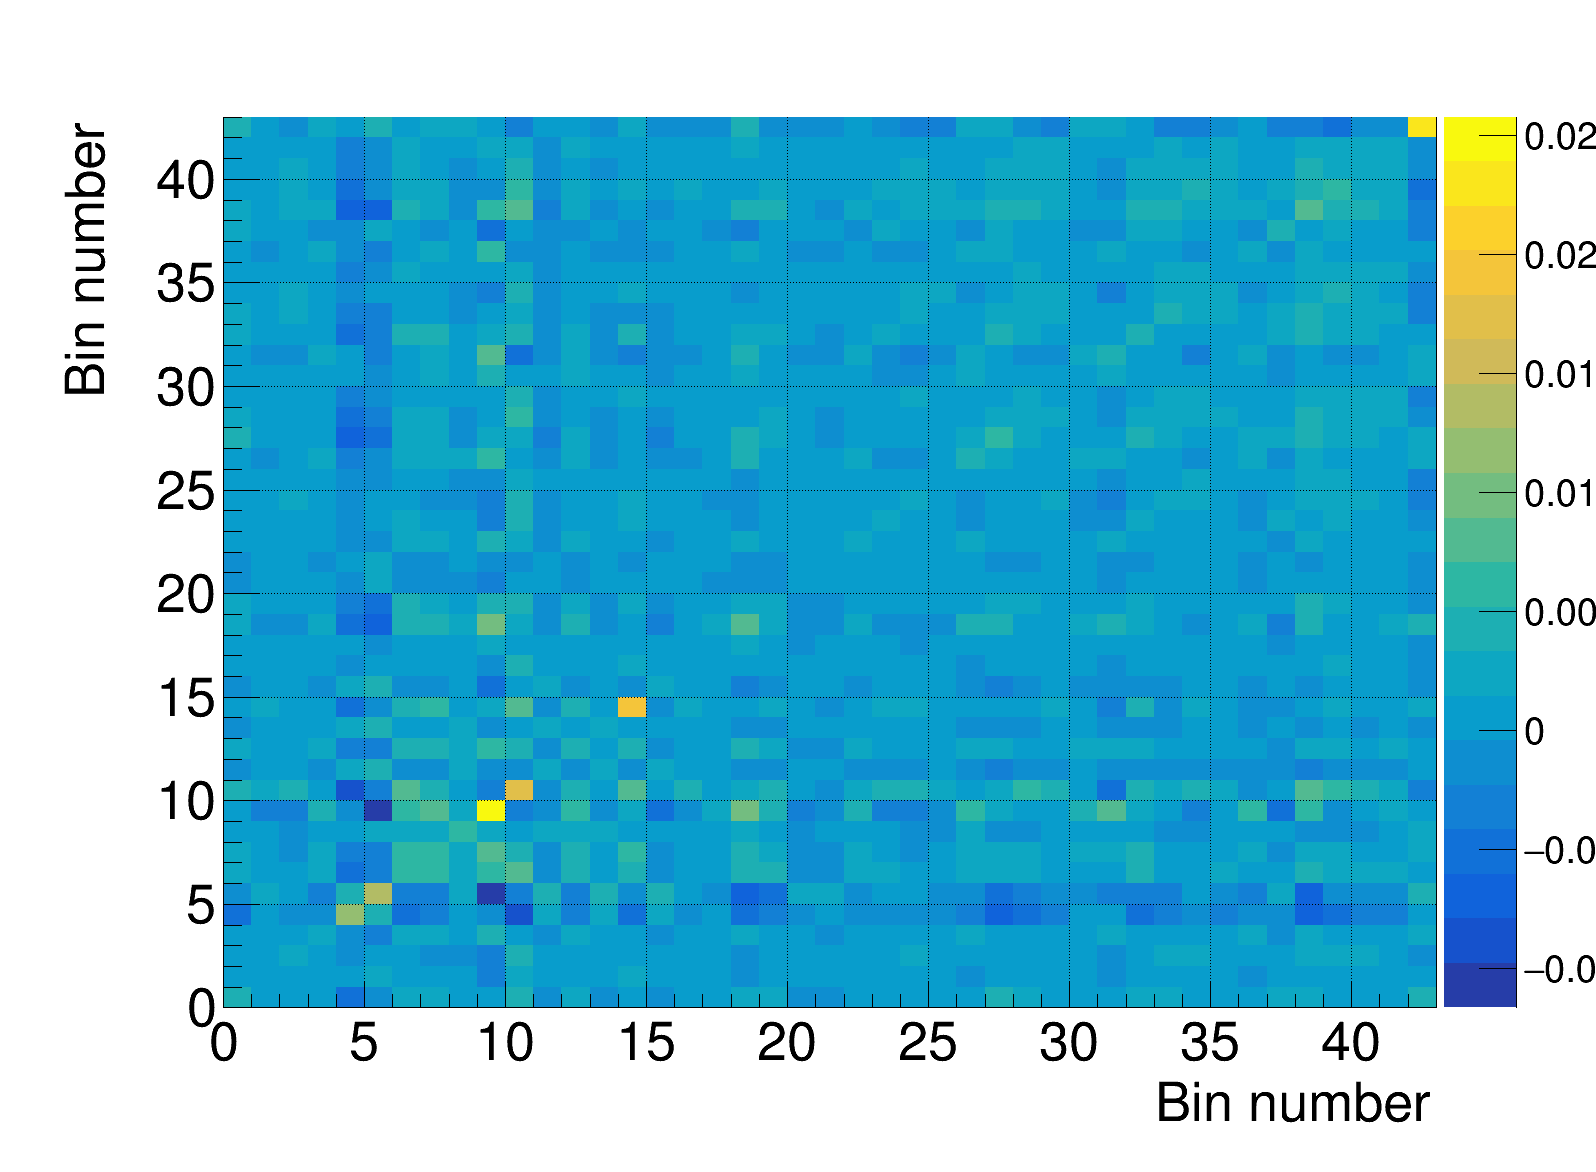

In [21]:
h_frac = FF.arr2plot(frac_tot)
h_frac.Draw('colz')
h_frac.SetXTitle('Bin number')
h_frac.SetYTitle('Bin number')
c1.Draw()
c1.SaveAs(outputdir_png + 'frac_covar_detsys'+".png")
#c1.SaveAs(outputdir_root + 'frac_covar_detsys'+".root")
c1.SaveAs(outputdir_pdf + 'frac_covar_detsys'+".pdf")

In [22]:
#print reco_vec
#print frac_tot[0][0],frac_tot[9][9]

In [23]:
#covar[0][0],covar[9][9]

Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff_detsys/png/covar_detsys.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff_detsys/pdf/covar_detsys.pdf has been created


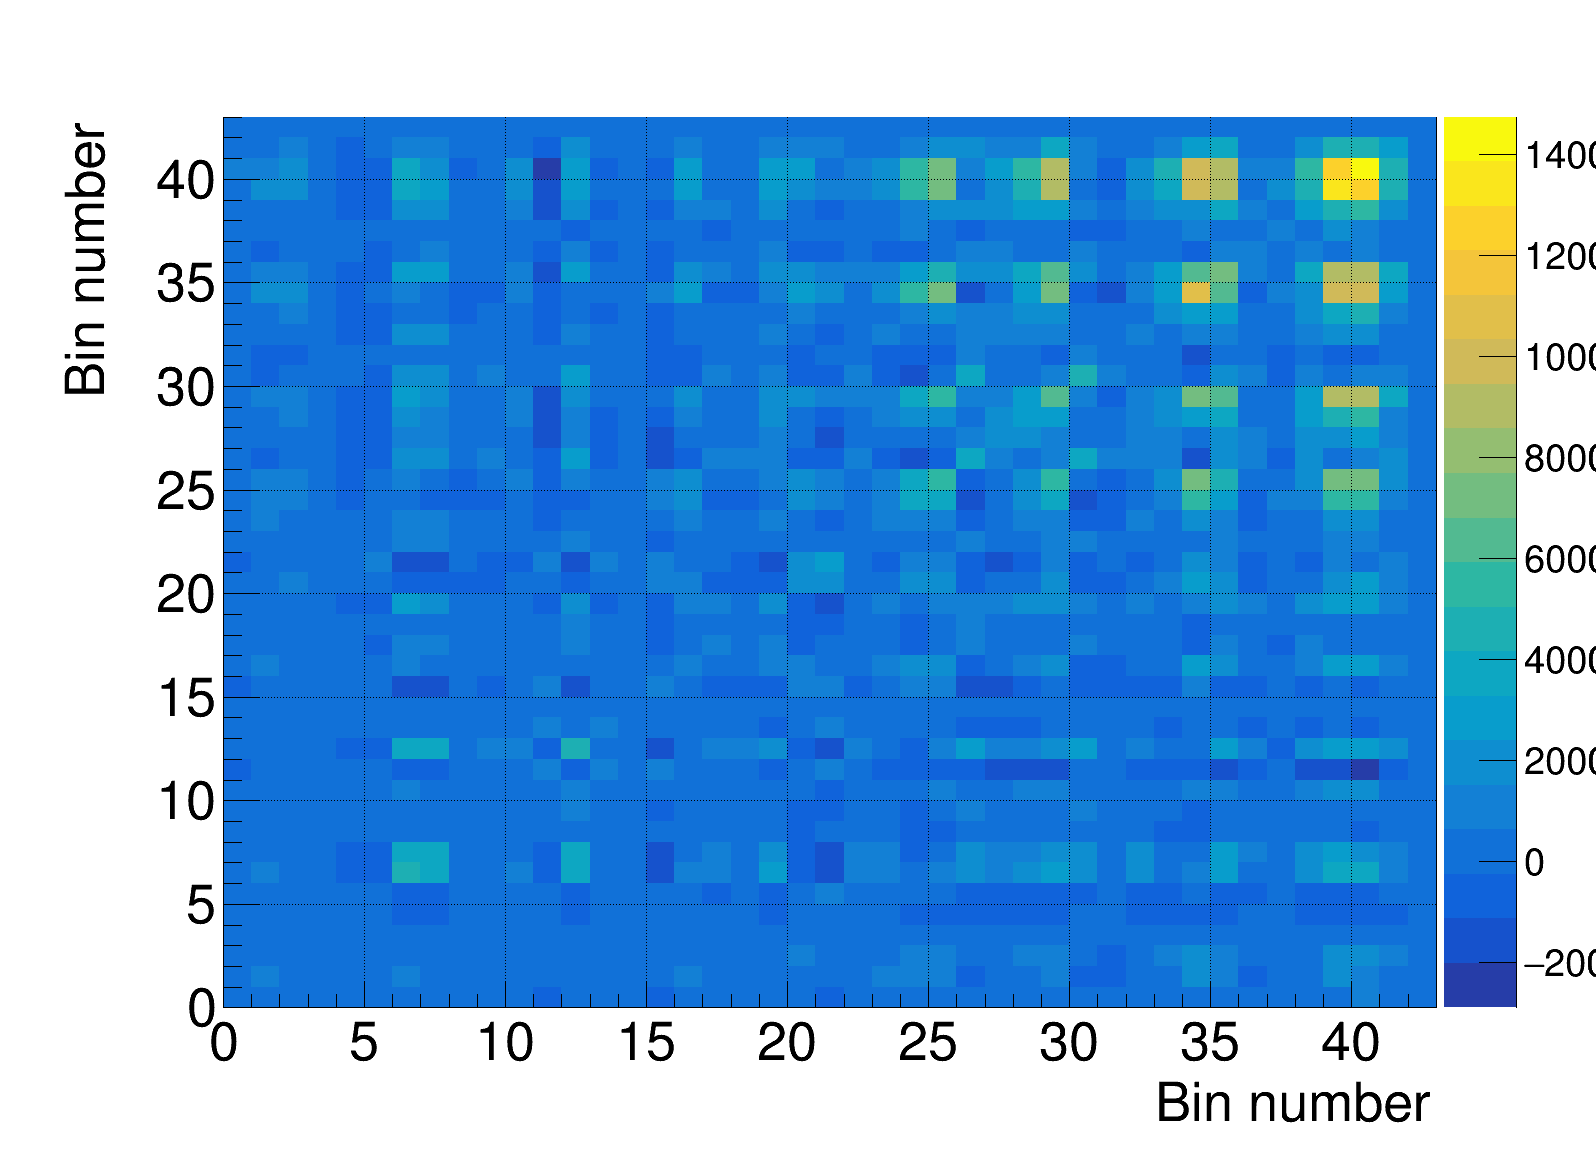

In [24]:

h_reco = FF.arr2plot(reco_vec)
h_reco.Add(h_ext)
h_reco.Add(h_bkg)
h_reco.Add(h_dirt)
reco_vec = FF.plot2arr(h_reco,1)

covar = FF.frac2cov(frac_tot,reco_vec)
#print covar
h_covar = FF.arr2plot(covar)
h_covar.SetXTitle('Bin number')
h_covar.SetYTitle('Bin number')
h_covar.Draw('colz')
c1.Draw()
c1.SaveAs(outputdir_png + 'covar_detsys'+".png")
#c1.SaveAs(outputdir_root + 'covar_detsys'+".root")
c1.SaveAs(outputdir_pdf + 'covar_detsys'+".pdf")

Warning in <TFile::Append>: Replacing existing TH1: h_this (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff_detsys/png/corr_detsys.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff_detsys/root/corr_detsys.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff_detsys/pdf/corr_detsys.pdf has been created


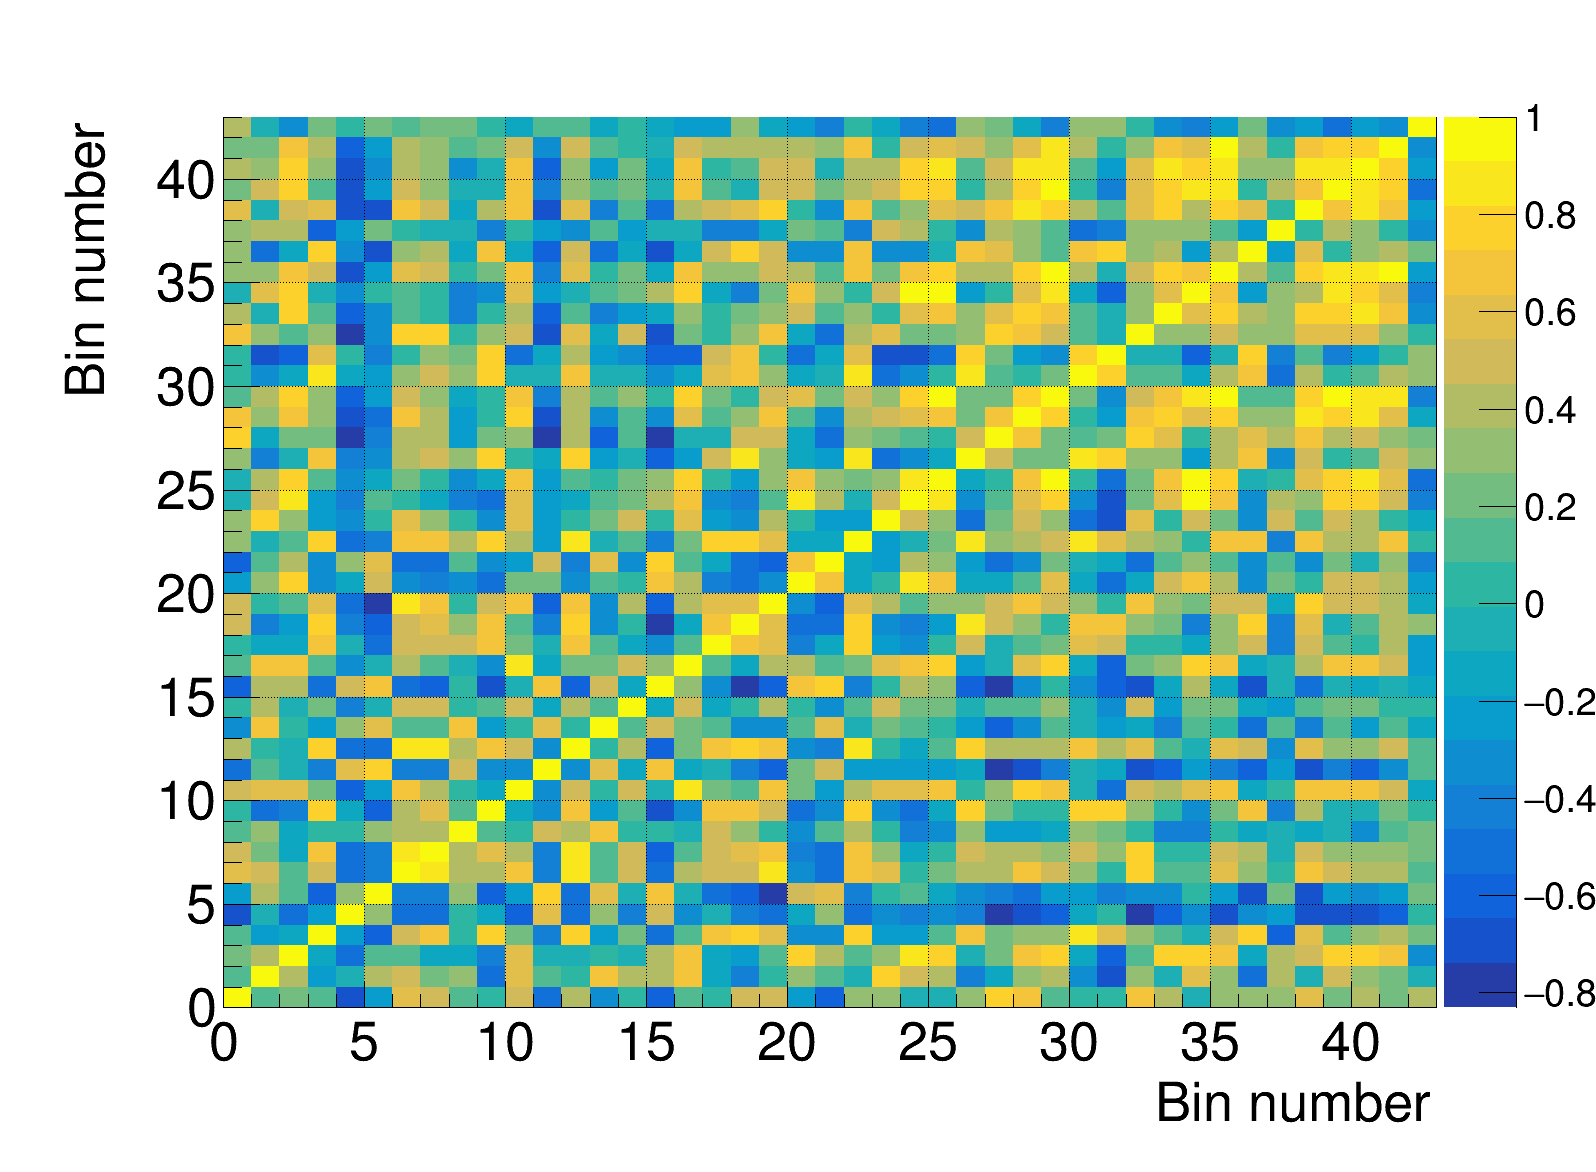

In [25]:
corr = FF.cov2corr(frac_tot)
h_corr = FF.arr2plot(corr)
h_corr.SetXTitle('Bin number')
h_corr.SetYTitle('Bin number')
h_corr.Draw('colz')
c1.Draw()
c1.SaveAs(outputdir_png + 'corr_detsys'+".png")
c1.SaveAs(outputdir_root + 'corr_detsys'+".root")
c1.SaveAs(outputdir_pdf + 'corr_detsys'+".pdf")

In [26]:
'''h_true = ROOT.TH1F('h_true',"true tune3",43,0,43)
h_data = ROOT.TH1F('h_data',"data",43,0,43)
h_bkg = ROOT.TH1F('h_bkg',"Background",43,0,43)
h_ext = ROOT.TH1F('h_ext',"Cosmic",43,0,43)
h_dirt = ROOT.TH1F('h_dirt',"Cosmic",43,0,43)'''

this_pot = 2.144e20#9.457e+18*1.81
#print 'go into function'
#calculate the covariance for the the prediction
path_detsys = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/My_Measurement/'
f_det = ROOT.TFile.Open(path_detsys+'FF_detsys.root', 'read')
para = ['dedx','LYatt','LYdown','LYray','recomb2','sce','waxz','wayz','wmx','wmyz']
#print 'Opend file'
#h_true_cv = h_true.Clone()
h_true_cv = f_det.Get('h_gen_cv')
#h_true_cv.Scale(this_pot/1.19653398031e+20)
#h_bkg_cv = f_det.Get('h_bkg_cv')
#h_bkg_cv.Scale(this_pot/9.457e+18)
h_ext_cv = f_det.Get('h_ext_cv')
h_dirt_cv = f_det.Get('h_dirt_cv')
h_bkg_cv = f_det.Get('h_bkg_detcv')
#h_ext_cv.Scale(this_pot/9.457e+18)
#h_dirt_cv.Scale(this_pot/9.457e+18)
h_bkg_cv.Scale(this_pot/9.457e+18)
h_smear_cv = f_det.Get('h_smear_detcv')
num_bins = h_smear_cv.GetNbinsX()
smear_mat = np.zeros((num_bins,num_bins))
true_vec = np.zeros((num_bins))
bkg_vec = np.zeros((num_bins))

for i in range(num_bins):
    true_vec[i] = h_true_cv.GetBinContent(i+1)
    bkg_vec[i] = h_bkg_cv.GetBinContent(i+1)
    for j in range(num_bins):
        smear_mat[i][j]= h_smear_cv.GetBinContent(i+1,j+1)
#print 'filled vecotrs'
print true_vec[1]
reco_vec = true_vec.dot(smear_mat)
h_tot_cv = FF.arr2plot(reco_vec)
print true_vec[1]

#h_tot_cv = h_reco.Clone()
h_tot_cv.Add(h_ext_cv)
h_tot_cv.Add(h_bkg_cv)
h_tot_cv.Add(h_dirt_cv)

bkg_vec_det = np.zeros((len(para),num_bins))
reco_vec_det = np.zeros((len(para),num_bins))
smear_mat_det = np.zeros((len(para),num_bins,num_bins))

#sig_vec_det = np.zeros((len(para),num_bins)) # signal + bkg prediction
res_vec_det = np.zeros((len(para),num_bins)) # residual
res_vec = np.zeros((num_bins)) # quadratic sum


h_bkg_det = []
h_smear_det = []
h_tot_det = []
#print 'go into loop'
for i,x in enumerate(para):
    h_tot_det.append(h_true_cv.Clone())
    h_bkg_det.append(f_det.Get('h_bkg_'+x))
    h_bkg_det[i].Scale(this_pot/9.457e18)
    h_smear_det.append(f_det.Get('h_smear_'+x))
    for j in range(num_bins):
        bkg_vec_det[i][j] = h_bkg_det[i].GetBinContent(j+1)
        for k in range(num_bins):
            smear_mat_det[i][j][k] = h_smear_det[i].GetBinContent(j+1,k+1)
    reco_vec_det[i]= true_vec.dot(smear_mat_det[i])
    #print reco_vec[1]+bkg_vec[1], reco_vec_det[i][1] + bkg_vec_det[i][1]
    #res_vec_det[i] = ((reco_vec+bkg_vec) - (reco_vec_det[i] + bkg_vec_det[i]))/(reco_vec+bkg_vec)

    for j in range(num_bins):
        h_tot_det[i].SetBinContent(j+1,reco_vec_det[i][j] + bkg_vec_det[i][j])
        #res_vec[j] += res_vec_det[i][j]*res_vec_det[i][j]

    h_tot_det[i].Add(h_ext_cv)
    h_tot_det[i].Add(h_dirt_cv)



    


1405.8421630859375
1405.8421630859375


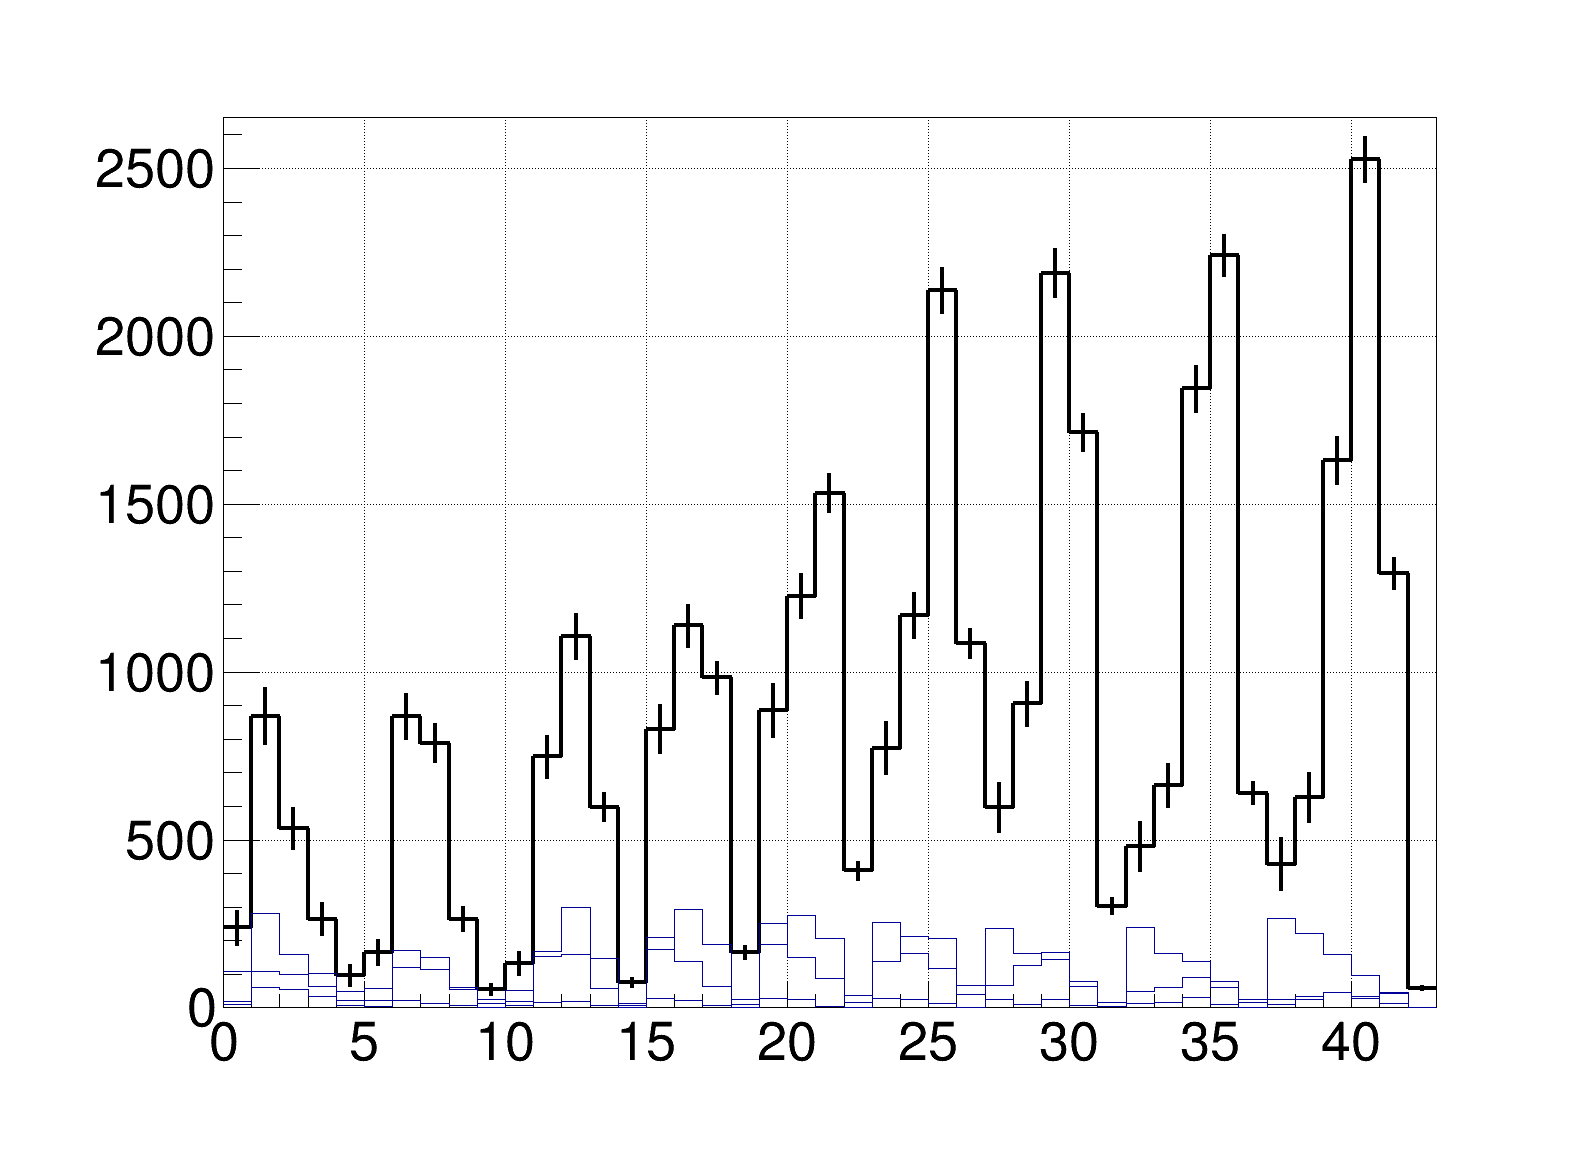

In [27]:
h_tot_cv.Draw('hist')
h_dirt_cv.Draw('same')
h_tot_cv.Draw('same')
h_ext_cv.Draw('same hist')
h_bkg_cv.Draw('same hist')

c1.Draw()

1 238.390701294 16.0835399958
2 869.287414551 27.0692246668
3 534.36340332 21.1281128466
4 264.732757568 10.467799696
5 96.7709197998 10.2472525431
6 165.399093628 19.392428345
7 867.620361328 68.489246358
8 788.843017578 59.6951943913
9 263.875427246 20.7792445816
10 55.8943252563 8.97071459301
11 132.551010132 17.8874464194
12 748.057067871 37.3796778135
13 1105.82751465 67.992794254
14 597.473815918 30.1471367161
15 75.2118148804 10.5313227755
16 830.559204102 35.0775878431
17 1138.1541748 36.1446990481
18 983.342529297 29.0132526566
19 164.761642456 14.6638751449
20 885.143188477 45.176127871
21 1225.61682129 42.3255342042
22 1533.37658691 53.6076750149
23 407.92956543 16.13611567
24 773.456604004 32.3669473407
25 1169.41442871 55.9168930552
26 2137.91821289 71.4588586567
27 1085.52026367 63.9703219645
28 596.906494141 47.257171293
29 906.026000977 49.1711909204
30 2188.74926758 81.3807718826
31 1713.70471191 64.035101496
32 302.862823486 20.9182938003
33 480.272735596 32.188930149

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff_detsys/png/h_xsec_detsys_errdetsys_ratio.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff_detsys/pdf/h_xsec_detsys_errdetsys_ratio.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff_detsys/root/h_xsec_detsys_errdetsys_ratio.root has been created


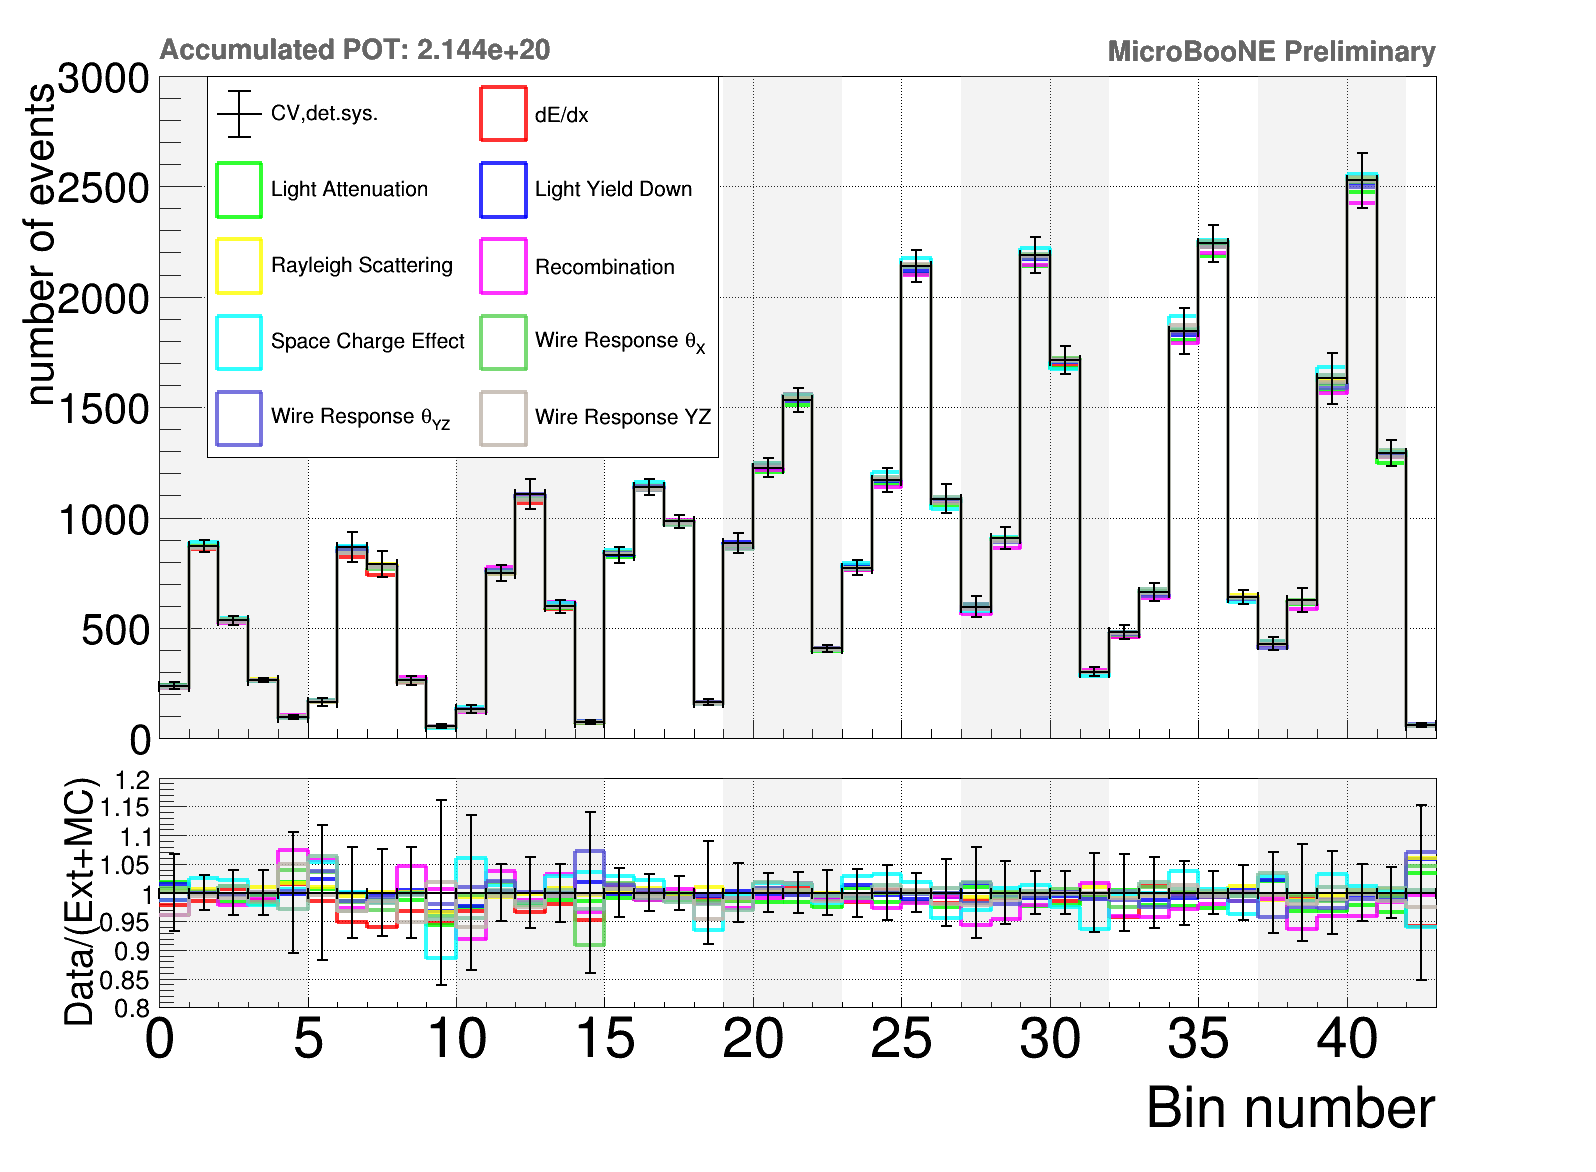

In [28]:

i = 0
#name_files = ['Central Value','Space Charge Effect','Light Yield Down','Wire Response #theta_{X}','Wire Response #theta_{YZ}','Wire Response X','Wire Response YZ','Light Attenuation','Rayleigh Scattering','Recombination']
para = ['dedx','LYatt','LYdown','LYray','recomb2','sce','waxz','wayz','wmx','wmyz']
#para = ['sce']
name_files = ['dE/dx','Light Attenuation','Light Yield Down','Rayleigh Scattering','Recombination','Space Charge Effect'\
              ,'Wire Response #theta_{X}','Wire Response #theta_{YZ}','Wire Response X','Wire Response YZ']
#name_files = ['Space Charge Effect']

legend = ROOT.TLegend(0.13,0.4,0.45,0.9); #LEGEND LEFT
legend.SetNColumns(2)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)

c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)

#h_tot_cv = h_reco.Clone()
legend.AddEntry(h_tot_cv,'CV,det.sys.',"lep")
for j in range(1,h_tot_cv.GetNbinsX()+1):
    h_tot_cv.SetBinError(j,math.sqrt(h_tot_cv.GetBinContent(j)*h_tot_cv.GetBinContent(j)*frac_tot[j-1][j-1]))
    print j, h_tot_cv.GetBinContent(j), h_tot_cv.GetBinError(j)
h_tot_cv.GetYaxis().SetLabelSize(0.06);
h_tot_cv.GetYaxis().SetTitleSize(0.06);
h_tot_cv.GetYaxis().SetTitleOffset(0.8);
h_tot_cv.GetXaxis().SetLabelOffset(999);
h_tot_cv.GetXaxis().SetTitleOffset(999);
h_tot_cv.GetXaxis().SetLabelSize(0);
h_tot_cv.GetXaxis().SetTitleSize(0);
h_tot_cv.SetMaximum(3000)
h_tot_cv.SetXTitle('Bin number')
h_tot_cv.SetYTitle('number of events')
#h_covariance.SetLineColor(ROOT.kBlack)
h_tot_cv.SetLineWidth(2)
ROOT.gStyle.SetEndErrorSize(5)
h_tot_cv.Draw('E1')
h_b = FF.histBkg(h_tot_cv.Clone())
h_b.Draw('hist same')
legend.Draw()
h_tot_cv.Draw('E1 same')
for i,x in enumerate(para):
    h_tot_det[i].SetLineColorAlpha(i+2,0.8)
    h_tot_det[i].SetLineWidth(4)
    if (i+2)==10:
        h_tot_det[i].SetLineColorAlpha(30,0.8)
    #if i ==0:
    #    legend.AddEntry(h_tot_det[i],'Central Value, det. sys. err',"lep")
    else:
        legend.AddEntry(h_tot_det[i],name_files[i],"f")
    h_tot_det[i].SetYTitle("d\sigma / d cos(\Theta) \t [10^{-38} cm^{2}]")
    h_tot_det[i].SetXTitle("cos(\Theta)_{\mu}")
    
    h_tot_det[i].Draw("hist same")
    #i+=1
h_tot_cv.SetLineColor(ROOT.kBlack)
h_tot_cv.Draw("E1 hist same")
#h_ext_cv.Draw('same')
#h_dirt_cv.Draw('same')
#legend.Draw()
prelim, pot_tex = FF.draw_adding()
prelim.Draw()
pot_tex.Draw()

c1.cd()
h_tot_cv.GetXaxis().SetLabelOffset(0);
h_tot_cv.GetXaxis().SetTitleOffset(0);
#h_data.GetXaxis().SetLabelSize(0.06);
#pad2 = ROOT.TPad('pad2','pad2',0,0.05,1,0.33)
pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()
h_files2 = []
h_files2_cv = h_tot_cv.Clone()
h_ = h_tot_cv.Clone()
for j in range(num_bins):
    h_.SetBinError(j+1,0)
    #h_files2_cv.SetBinError(j+1,0)
h_files2_cv.Divide(h_)
h_files2_cv.SetYTitle('Data/(Ext+MC)')
h_files2_cv.GetYaxis().SetTitleSize(0.1)
h_files2_cv.GetYaxis().SetTitleOffset(0.3)
h_files2_cv.GetYaxis().SetLabelSize(0.07)

h_files2_cv.GetXaxis().SetTitleSize(0.15)
h_files2_cv.GetXaxis().SetLabelSize(0.15)
h_files2_cv.GetXaxis().SetTitleOffset(1)
h_files2_cv.SetMinimum(0.8)
h_files2_cv.SetMaximum(1.2)
h_files2_cv.Draw('hist')
h_b.Draw('same hist')

for i,x in enumerate(para):
    #h_files2.append(h_.Clone())
    #h_files2[i].Divide(h_tot_det[i])
    h_files2.append(h_tot_det[i].Clone())
    h_files2[i].Divide(h_tot_cv)
    h_files2[i].SetLineColorAlpha(i+2,0.8)
    if (i+2)==10:
        h_files2[i].SetLineColorAlpha(30,0.8)

    #if i==5:
    h_files2[i].Draw('hist same')

h_files2_cv.Draw('E1 same')
c1.Draw()


c1.SaveAs(outputdir_png + "h_xsec_detsys_errdetsys_ratio.png")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_errdetsys_ratio.pdf")
c1.SaveAs(outputdir_root + "h_xsec_detsys_errdetsys_ratio.root")



1 238.390701294 16.0835399958
2 869.287414551 27.0692246668
3 534.36340332 21.1281128466
4 264.732757568 10.467799696
5 96.7709197998 10.2472525431
6 165.399093628 19.392428345
7 867.620361328 68.489246358
8 788.843017578 59.6951943913
9 263.875427246 20.7792445816
10 55.8943252563 8.97071459301
11 132.551010132 17.8874464194
12 748.057067871 37.3796778135
13 1105.82751465 67.992794254
14 597.473815918 30.1471367161
15 75.2118148804 10.5313227755
16 830.559204102 35.0775878431
17 1138.1541748 36.1446990481
18 983.342529297 29.0132526566
19 164.761642456 14.6638751449
20 885.143188477 45.176127871
21 1225.61682129 42.3255342042
22 1533.37658691 53.6076750149
23 407.92956543 16.13611567
24 773.456604004 32.3669473407
25 1169.41442871 55.9168930552
26 2137.91821289 71.4588586567
27 1085.52026367 63.9703219645
28 596.906494141 47.257171293
29 906.026000977 49.1711909204
30 2188.74926758 81.3807718826
31 1713.70471191 64.035101496
32 302.862823486 20.9182938003
33 480.272735596 32.188930149

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff_detsys/png/h_xsec_detsys_errdetsys_ratio_sce.png has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff_detsys/pdf/h_xsec_detsys_errdetsys_ratio_sce.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff_detsys/root/h_xsec_detsys_errdetsys_ratio_sce.root has been created


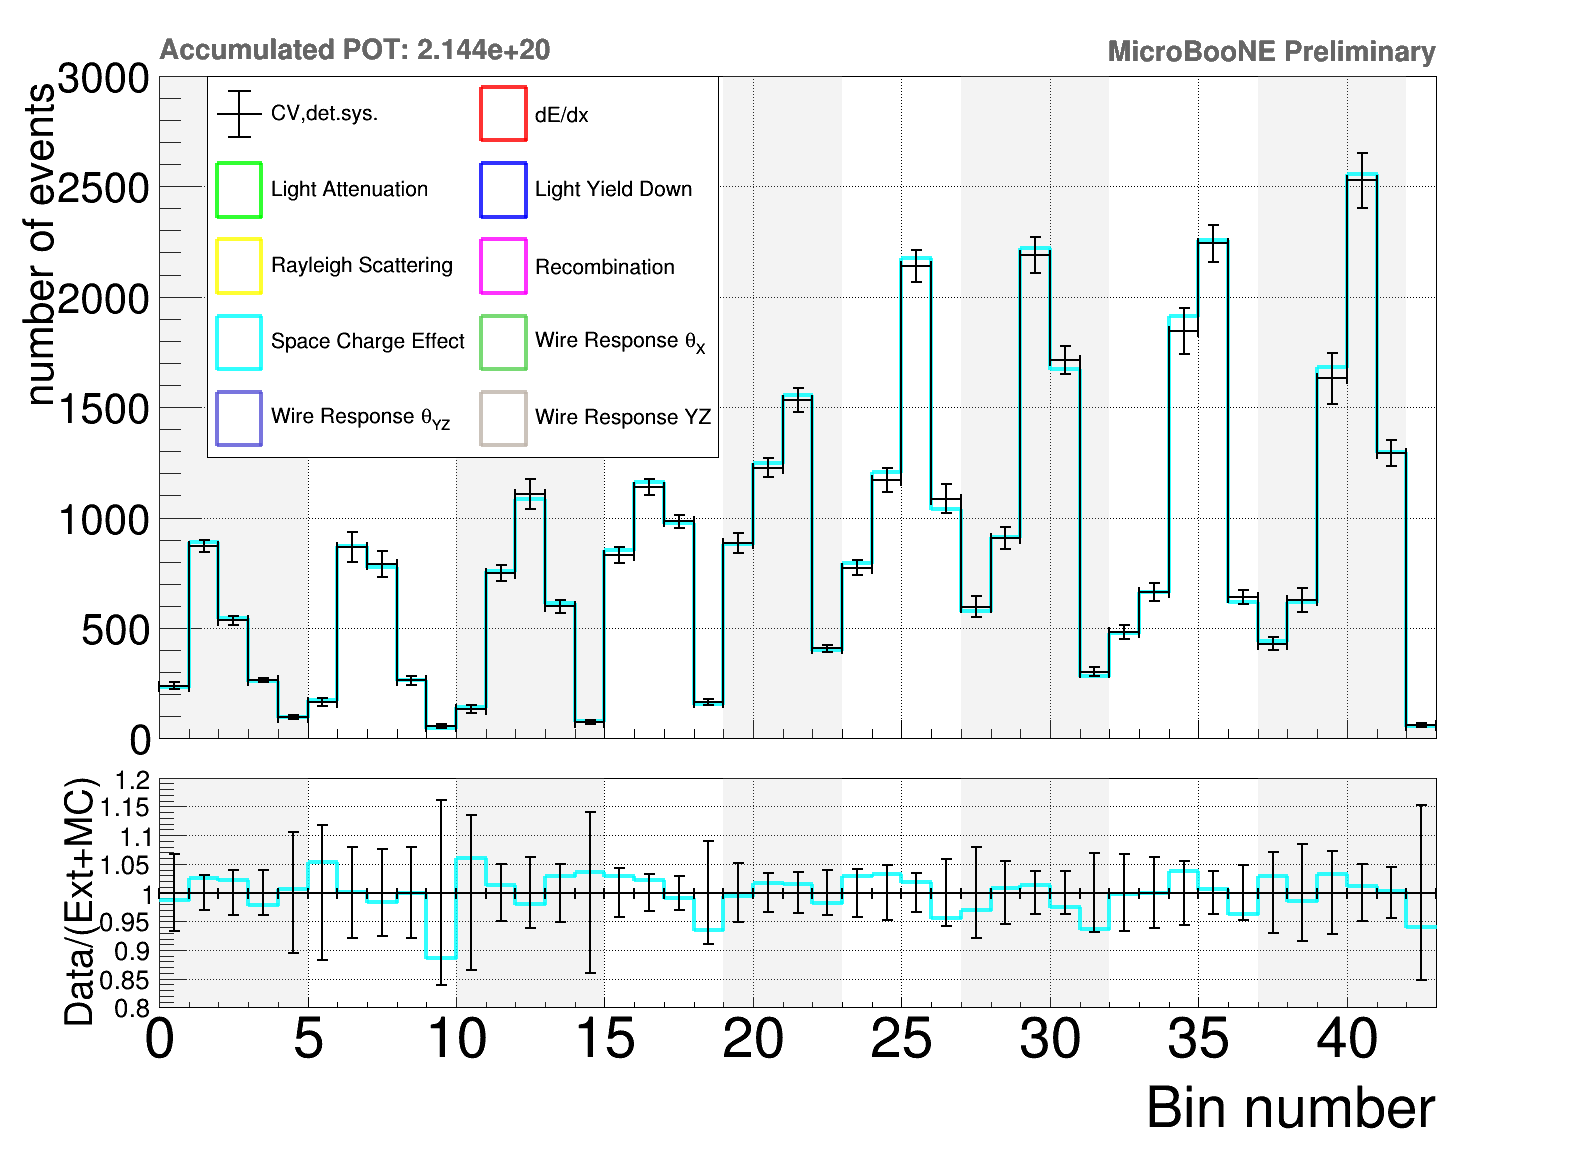

In [29]:

i = 0
#name_files = ['Central Value','Space Charge Effect','Light Yield Down','Wire Response #theta_{X}','Wire Response #theta_{YZ}','Wire Response X','Wire Response YZ','Light Attenuation','Rayleigh Scattering','Recombination']
para = ['dedx','LYatt','LYdown','LYray','recomb2','sce','waxz','wayz','wmx','wmyz']
#para = ['sce']
name_files = ['dE/dx','Light Attenuation','Light Yield Down','Rayleigh Scattering','Recombination','Space Charge Effect'\
              ,'Wire Response #theta_{X}','Wire Response #theta_{YZ}','Wire Response X','Wire Response YZ']
#name_files = ['Space Charge Effect']

legend = ROOT.TLegend(0.13,0.4,0.45,0.9); #LEGEND LEFT
legend.SetNColumns(2)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)

c1.cd()
pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)

#h_tot_cv = h_reco.Clone()
legend.AddEntry(h_tot_cv,'CV,det.sys.',"lep")
for j in range(1,h_tot_cv.GetNbinsX()+1):
    h_tot_cv.SetBinError(j,math.sqrt(h_tot_cv.GetBinContent(j)*h_tot_cv.GetBinContent(j)*frac_tot[j-1][j-1]))
    print j, h_tot_cv.GetBinContent(j), h_tot_cv.GetBinError(j)
h_tot_cv.GetYaxis().SetLabelSize(0.06);
h_tot_cv.GetYaxis().SetTitleSize(0.06);
h_tot_cv.GetYaxis().SetTitleOffset(0.8);
h_tot_cv.GetXaxis().SetLabelOffset(999);
h_tot_cv.GetXaxis().SetTitleOffset(999);
h_tot_cv.GetXaxis().SetLabelSize(0);
h_tot_cv.GetXaxis().SetTitleSize(0);
h_tot_cv.SetMaximum(3000)
h_tot_cv.SetXTitle('Bin number')
h_tot_cv.SetYTitle('number of events')
#h_covariance.SetLineColor(ROOT.kBlack)
h_tot_cv.SetLineWidth(2)
ROOT.gStyle.SetEndErrorSize(5)
h_tot_cv.Draw('E1')
h_b = FF.histBkg(h_tot_cv.Clone())
h_b.Draw('hist same')
legend.Draw()
h_tot_cv.Draw('E1 same')
for i,x in enumerate(para):
    h_tot_det[i].SetLineColorAlpha(i+2,0.8)
    h_tot_det[i].SetLineWidth(4)
    if (i+2)==10:
        h_tot_det[i].SetLineColorAlpha(30,0.8)
    #if i ==0:
    #    legend.AddEntry(h_tot_det[i],'Central Value, det. sys. err',"lep")
    else:
        legend.AddEntry(h_tot_det[i],name_files[i],"f")
    h_tot_det[i].SetYTitle("d\sigma / d cos(\Theta) \t [10^{-38} cm^{2}]")
    h_tot_det[i].SetXTitle("cos(\Theta)_{\mu}")
    if i==5:
        h_tot_det[i].Draw("hist same")
    #i+=1
h_tot_cv.SetLineColor(ROOT.kBlack)
h_tot_cv.Draw("E1 hist same")
#h_ext_cv.Draw('same')
#h_dirt_cv.Draw('same')
#legend.Draw()
prelim, pot_tex = FF.draw_adding()
prelim.Draw()
pot_tex.Draw()

c1.cd()
h_tot_cv.GetXaxis().SetLabelOffset(0);
h_tot_cv.GetXaxis().SetTitleOffset(0);
#h_data.GetXaxis().SetLabelSize(0.06);
#pad2 = ROOT.TPad('pad2','pad2',0,0.05,1,0.33)
pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()
h_files2 = []
h_files2_cv = h_tot_cv.Clone()
h_ = h_tot_cv.Clone()
for j in range(num_bins):
    h_.SetBinError(j+1,0)
    #h_files2_cv.SetBinError(j+1,0)
h_files2_cv.Divide(h_)
h_files2_cv.SetYTitle('Data/(Ext+MC)')
h_files2_cv.GetYaxis().SetTitleSize(0.1)
h_files2_cv.GetYaxis().SetTitleOffset(0.3)
h_files2_cv.GetYaxis().SetLabelSize(0.07)

h_files2_cv.GetXaxis().SetTitleSize(0.15)
h_files2_cv.GetXaxis().SetLabelSize(0.15)
h_files2_cv.GetXaxis().SetTitleOffset(1)
h_files2_cv.SetMinimum(0.8)
h_files2_cv.SetMaximum(1.2)
h_files2_cv.Draw('hist')
h_b.Draw('same hist')

for i,x in enumerate(para):
    #h_files2.append(h_.Clone())
    #h_files2[i].Divide(h_tot_det[i])
    h_files2.append(h_tot_det[i].Clone())
    h_files2[i].Divide(h_tot_cv)
    h_files2[i].SetLineColorAlpha(i+2,0.8)
    if (i+2)==10:
        h_files2[i].SetLineColorAlpha(30,0.8)

    if i==5:
        h_files2[i].Draw('hist same')

h_files2_cv.Draw('E1 same')
c1.Draw()


c1.SaveAs(outputdir_png + "h_xsec_detsys_errdetsys_ratio_sce.png")
c1.SaveAs(outputdir_pdf + "h_xsec_detsys_errdetsys_ratio_sce.pdf")
c1.SaveAs(outputdir_root + "h_xsec_detsys_errdetsys_ratio_sce.root")



In [30]:
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [31]:


h_tot_cv.Draw('E1 same')
n_start  = -1
n_end = 43
tot_ev_cv = h_tot_cv.Integral(n_start,n_end)
n_detsys = np.zeros((len(para)))
tot = 0
for i,x in enumerate(para):
    n_detsys[i] = h_tot_det[i].Integral(n_start,n_end)
    print '## ',x,' : ',n_detsys[i],tot_ev_cv, (n_detsys[i]-tot_ev_cv)/tot_ev_cv*100.0
    tot+=(n_detsys[i]-tot_ev_cv)*(n_detsys[i]-tot_ev_cv)
print (math.sqrt(tot))/tot_ev_cv*100.0

##  dedx  :  36951.06364440918 37279.3762093 -0.8806814872838751
##  LYatt  :  36641.4907951355 37279.3762093 -1.7110946560449807
##  LYdown  :  37103.54016494751 37279.3762093 -0.47167110126657985
##  LYray  :  37280.124015808105 37279.3762093 0.0020059524195754483
##  recomb2  :  36660.22826766968 37279.3762093 -1.6608323543664296
##  sce  :  37518.435932159424 37279.3762093 0.6412653515404468
##  waxz  :  37175.67599487305 37279.3762093 -0.27817046563196096
##  wayz  :  37043.491596221924 37279.3762093 -0.6327482834289566
##  wmx  :  37308.639572143555 37279.3762093 0.07849745854184485
##  wmyz  :  37053.02442550659 37279.3762093 -0.6071769615507211
2.81923442228


In [32]:
delet this
print np.sum(reco_vec+bkg_vec)
        print np.sum(reco_vec_det[i] + bkg_vec_det[i])
        print np.sum(reco_vec+bkg_vec+ext_vec+dirt_vec)
        print np.sum(res_vec_det[i])
        
        print reco_vec
        print bkg_vec
        print np.sum(reco_vec)
        print np.sum(bkg_vec)

SyntaxError: invalid syntax (<ipython-input-32-4e11b5cbdd93>, line 1)

In [ ]:
asfgsefg

In [ ]:
def eventrate_comparison(h_data_func,h_ext_func,h_dirt_func,h_bkg_func,h_true_func, filename,model_name):
    c1 = ROOT.TCanvas("c1","c1",1600,1200)
    c1.SetGrid(1)
    c1.SetLeftMargin(0.14)
    c1.SetRightMargin(0.1)
    c1.SetBottomMargin(0.1)

    c1.cd()

    pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
    pad1.SetGrid(1)
    pad1.Draw()
    pad1.cd()
    pad1.SetBottomMargin(0.03);
    pad1.SetTopMargin(0.1)

    FF.main_plot(h_data_func)
    
    h_reco_func = smear_plot(h_true_func)

    hs = ROOT.THStack("hs","");
    h_ext_func.SetFillColor(ROOT.kBlue+2)
    h_ext_func.SetLineColor(ROOT.kBlue+2)
    h_ext_func.SetFillStyle(3004)
    h_dirt_func.SetFillColor(ROOT.kOrange+2);
    h_dirt_func.SetLineColor(ROOT.kOrange+2);
    h_bkg_func.SetFillColor(ROOT.kGray)
    h_bkg_func.SetLineColor(ROOT.kGray)
    h_reco_func.SetFillColor(ROOT.kRed)
    h_reco_func.SetLineColor(ROOT.kRed)
    hs.Add(h_ext_func)
    hs.Add(h_dirt_func)
    hs.Add(h_bkg_func)
    hs.Add(h_reco_func)

    h_data_func.SetXTitle("Reco bin number")
    h_data_func.SetYTitle("Number of events")

    h_tot = h_reco_func.Clone()
    h_tot.Add(h_bkg_func)
    
    num_bins = 43 # get eventually better than hardcode
    for i in range(num_bins):
        h_tot.SetBinError(i+1,math.sqrt(frac_tot[i][i])*h_tot.GetBinContent(i+1))
    pred_vec = FF.plot2arr(h_tot,1)
    
    h_tot.Add(h_ext_func)
    h_tot.Add(h_dirt_func)
    h_tot.SetFillColor(ROOT.kBlack)
    h_tot.SetLineColor(ROOT.kBlack)
    h_tot.SetFillStyle(3004)
    
    # calculate CHi2
    dat_vec = FF.plot2arr(h_data_func,1)
    dat_vec = dat_vec[0:-1]
    tot_vec = FF.plot2arr(h_tot,1)
    tot_vec = tot_vec[0:-1]
    covar = np.zeros((num_bins-1,num_bins-1))
    #get covar on signal+bkg
    for i in range(num_bins-1):
        for j in range(num_bins-1):
            covar[i][j] = frac_tot[i][j]*pred_vec[i]*pred_vec[j]
    
    #get stat data covar:
    covar_data = np.zeros((num_bins-1,num_bins-1))
    for i in range(num_bins-1):
        covar_data[i][i] = frac_stat[i][i]*dat_vec[i]*dat_vec[i]
    
    # get dirt uncertainty (100%)
    covar_dirt = np.zeros((num_bins-1,num_bins-1))
    pred_vec_all = FF.plot2arr(h_tot,1)
    for i in range(num_bins-1):
        for j in range(num_bins-1):
            covar_dirt[i][j] = frac_dirt[i][j]*pred_vec_all[i]*pred_vec_all[j]
    
    # get crt uncertainty
    covar_crt = np.zeros((num_bins-1,num_bins-1))
    for i in range(num_bins-1):
        for j in range(num_bins-1):
            covar_crt[i][j] = frac_crt[i][j]*pred_vec_all[i]*pred_vec_all[j]
    
    
    covar+=covar_data+covar_dirt+covar_crt
    #inv_covar = sla.inv(covar,check_finite=False)
    inv_covar = np.linalg.inv(covar)
    diff_vec = (dat_vec - tot_vec)
    #chi2_tmp = diff_vec.dot(inv_covar)
    #chi2 = chi2_tmp.dot(diff_vec)
    chi2 = 0.0
    for i in range(42):
        for j in range(42):
            chi2 += diff_vec[i]*inv_covar[i][j]*diff_vec[j]
        
    #print 'Data: ',dat_vec
    #print 'pred: ',tot_vec
    #print 'diff: ',diff_vec
    #print 'covar: ',covar
    #print 'inv covar: ',inv_covar
    #print chi2_tmp, chi2_tmp.shape
    print 'Chi2 = ',chi2
    h_data_func.SetMaximum(-1111)
    h_data_func.SetMaximum(h_data_func.GetMaximum()*1.2)
    h_data_func.Draw('E1')
    h_histo = FF.histBkg(h_err)
    h_histo.Draw('hist same')
    hs.Draw('same hist')
    h_tot.Draw('same E2')
    
    legend = ROOT.TLegend(0.15,0.65,0.5,0.9)
    legend.AddEntry(h_data_func,'Data + stat.',"lep");
    legend.AddEntry(h_tot,model_name+' + bkg: #chi^{2}:'+'{:04.1f})'.format(chi2),"f");
    #legend.AddEntry(h_tot,'Syst. error, #chi^{2}:'+'{:04.1f})'.format(chi2),"f");
    legend.Draw()
    
    h_data_func.Draw('E1 same')

    prelim, pot_tex = FF.draw_adding()
    prelim.Draw()
    pot_tex.Draw()

    h_data_func.GetYaxis().SetTitleOffset(1);
    h_data_func.GetXaxis().SetLabelOffset(999);
    h_data_func.GetXaxis().SetTitleOffset(999);
    h_data_func.GetXaxis().SetLabelSize(0);
    h_data_func.GetXaxis().SetTitleSize(0);
    
    c1.cd()
    h_data_func.GetXaxis().SetLabelOffset(0);
    h_data_func.GetXaxis().SetTitleOffset(0);

    pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
    pad2.SetGrid(1)
    pad2.SetTopMargin(0.04)
    pad2.SetBottomMargin(0.4)
    pad2.Draw()
    pad2.cd()
    h_tot_noerr = h_tot.Clone()
    for i in range(43):
        h_tot_noerr.SetBinError(i,0)
    h_xsec_data_ratio = h_data_func.Clone()
    h_xsec_data_ratio.Divide(h_tot_noerr)
    h_mc_ratio = h_tot.Clone()
    h_mc_ratio.Divide(h_tot_noerr)

    h_xsec_data_ratio.SetYTitle('Data/(Ext+MC)')
    h_xsec_data_ratio.GetYaxis().SetTitleSize(0.1)
    h_xsec_data_ratio.GetYaxis().SetTitleOffset(0.3)
    h_xsec_data_ratio.GetYaxis().SetLabelSize(0.07)
    h_xsec_data_ratio.GetXaxis().SetTitleSize(0.15)
    h_xsec_data_ratio.GetXaxis().SetLabelSize(0.15)
    h_xsec_data_ratio.GetXaxis().SetTitleOffset(1)
    h_xsec_data_ratio.SetMaximum(2)
    h_xsec_data_ratio.Draw('E1')
    h_histo.Draw('hist same')
    h_mc_ratio.Draw('E2 same')

    c1.Draw()
    c1.SaveAs(outputdir_png + filename+".png")
    c1.SaveAs(outputdir_root + filename+".root")
    c1.SaveAs(outputdir_pdf + filename+".pdf")

    return


In [ ]:
path_gen = '/home/tmettler/Desktop/uBoone/Nuisance/root_trees/'
f_g3 = ROOT.TFile.Open(path_gen+"ccinc_2d_genie3.root", 'read')
f_g2 = ROOT.TFile.Open(path_gen+"ccinc_2d_genie2.root", 'read')
f_gibuu = ROOT.TFile.Open(path_gen+"ccinc_2d_gibuu.root", 'read')
f_neut = ROOT.TFile.Open(path_gen+"ccinc_2d_neut.root", 'read')
f_nuwro = ROOT.TFile.Open(path_gen+"ccinc_2d_nuwro.root", 'read')

h_xsec_g3 = f_g3.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC;1')
h_xsec_g2 = f_g2.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')
h_xsec_gibuu = f_gibuu.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')
h_xsec_neut = f_neut.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')
h_xsec_nuwro = f_nuwro.Get('MicroBooNE_CCInc_XSec_2DPcos_nu_MC')

#print f_g3.ls()
#h_true_g3.Draw()
#c1.Draw()

In [ ]:
def xsec2rate(h_true):
    #xsec to event rate:
    # need pot/flux, xsec
    h_rate = h_true.Clone()
    bin_counter = 0
    for t_bin in range(len_theta): #len_theta
        h_temp = f_cv.Get('h_data['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            bin_width =  h_temp.GetBinWidth(m_bin+1)
            bin_width_theta = theta_bins[t_bin+1] - theta_bins[t_bin]
            h_rate.SetBinContent(bin_counter,h_rate.GetBinContent(bin_counter)*(bin_width*bin_width_theta))
            h_rate.SetBinError(bin_counter,h_rate.GetBinError(bin_counter)*(bin_width*bin_width_theta))
    h_rate.Scale(N_tot*flux_cv)
    return h_rate

In [ ]:
#h_reco_rate = smear_plot(h_rate)

h_rate_g3 = xsec2rate(h_xsec_g3)
h_rate_g2 = xsec2rate(h_xsec_g2)
h_rate_gibuu = xsec2rate(h_xsec_gibuu)
h_rate_neut = xsec2rate(h_xsec_neut)
h_rate_nuwro = xsec2rate(h_xsec_nuwro)

In [ ]:
#inv = np.linalg.inv(frac_tot)

In [ ]:
'''data_arr = FF.plot2arr(h_data,1)
#print data_arr
bkg_arr = FF.plot2arr(h_bkg,1)
#print bkg_arr
true_arr = FF.plot2arr(h_true,1)
#print true_arr
reco_arr = FF.plot2arr(h_reco,1)
#print reco_arr
pred_vec = bkg_arr+reco_arr
covar = np.zeros((42,42))
for i in range(42):
        for j in range(42):
            covar[i][j] = frac_tot[i][j]*pred_vec[i]*pred_vec[j]
inv = np.linalg.inv(covar)
inv = FF.arr2plot(covar)
inv.Draw('colz')
c1.Draw()
print covar[:][41]'''

In [ ]:
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_true, 'event_rate_G3_tune','G3 uB tune')

eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_g3, 'event_rate_G3','G3')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_g2, 'event_rate_G2','G2')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_gibuu, 'event_rate_gibuu','GiBuu')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_neut, 'event_rate_neut','Neut')
eventrate_comparison(h_data,h_ext,h_dirt,h_bkg,h_rate_nuwro, 'event_rate_nuwro','NuWro')


In [ ]:
dfasadsf

In [ ]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

In [ ]:
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.1)

c1.cd()

pad1 = ROOT.TPad('pad1','pad1',0,0.35,1,1)
pad1.SetGrid(1)
pad1.Draw()
pad1.cd()
pad1.SetBottomMargin(0.03);
pad1.SetTopMargin(0.1)

h_xsec_data = h_data.Clone()
h_xsec_data.Add(h_ext,-1)
h_xsec_data.Add(h_dirt,-1)
h_xsec_data.Add(h_bkg,-1)

num_bins = h_xsec_data.GetNbinsX()

h_xsec_data.Scale(1.0/(N_tot*flux_cv*1e-38))

h_xsec_reco = h_reco.Clone()

for i in range(43):
    h_xsec_reco.SetBinError(i+1,math.sqrt(frac_tot[i][i])*(h_reco.GetBinContent(i+1)))#+h_bkg.GetBinContent(i+1)))
    
h_xsec_reco.Scale(1.0/(N_tot*flux_cv*1e-38))

bin_counter = 0
for t_bin in range(len_theta): #len_theta
    h_temp = f_cv.Get('h_data['+str(t_bin)+']')
    for m_bin in range(len_mom[t_bin]):
        bin_counter+=1
        bin_width =  h_temp.GetBinWidth(m_bin+1)
        bin_width_theta = theta_bins[t_bin+1] - theta_bins[t_bin]
        h_xsec_data.SetBinContent(bin_counter,h_xsec_data.GetBinContent(bin_counter)/(bin_width*bin_width_theta))
        h_xsec_data.SetBinError(bin_counter,h_xsec_data.GetBinError(bin_counter)/(bin_width*bin_width_theta))
        h_xsec_reco.SetBinContent(bin_counter,h_xsec_reco.GetBinContent(bin_counter)/(bin_width*bin_width_theta))
        h_xsec_reco.SetBinError(bin_counter,h_xsec_reco.GetBinError(bin_counter)/(bin_width*bin_width_theta))
#here

pred_vec = FF.plot2arr(h_xsec_reco,1)

# calculate CHi2
dat_vec = FF.plot2arr(h_xsec_data,1)
dat_vec = dat_vec[0:-1]
tot_vec = FF.plot2arr(h_xsec_reco,1)
tot_vec = tot_vec[0:-1]
covar = np.zeros((num_bins-1,num_bins-1))

for i in range(num_bins-1):
    for j in range(num_bins-1):
        covar[i][j] = frac_tot[i][j]*tot_vec[i]*tot_vec[j]
#covar = covar
#inv_covar = sla.inv(covar,check_finite=False)
inv_covar = np.linalg.inv(covar)
diff_vec = (dat_vec - tot_vec)
#chi2_tmp = diff_vec.dot(inv_covar)
#chi2 = chi2_tmp.dot(diff_vec)
chi2 = 0.0
for i in range(42):
    for j in range(42):
        #if(i!=4 and i!=9 and j!=4 and j!=9):
        tmp = diff_vec[i]*inv_covar[i][j]*diff_vec[j]
        chi2+= tmp
        #print diff_vec[i],diff_vec[j],inv_covar[i][j],tmp
#print 'Data: ',dat_vec
#print 'pred: ',tot_vec
#print 'diff: ',diff_vec
#print 'covar: ',covar
#print 'inv covar: ',inv_covar
#print chi2_tmp, chi2_tmp.shape
print 'Chi2 = ',chi2    
        

h_xsec_data.SetXTitle("Reco bin number")
h_xsec_data.SetYTitle("#frac{#sigma^{2}}{dp_{#mu} dcos(#theta)} \t [10^{-38} #frac{cm^{2}}{GeV Nucleon}]")


h_xsec_reco.SetFillColor(ROOT.kRed)
h_xsec_reco.SetLineColor(ROOT.kRed)
h_xsec_reco.SetFillStyle(3004)
h_xsec_data.Draw('E1')
h_histo = FF.histBkg(h_err)
h_histo.Draw('hist same')
h_xsec_reco.Draw('same E2')
h_xsec_reco2 = h_xsec_reco.Clone()
h_xsec_reco2.SetFillColor(0)
h_xsec_reco2.Draw('same hist')

h_xsec_data.Draw('E1 same')

pot_data = 2.144e+20
prelim, pot_tex = FF.draw_adding()
prelim.Draw()
pot_tex.Draw()

h_xsec_data.GetYaxis().SetTitleOffset(0.9);
h_xsec_data.GetXaxis().SetLabelOffset(999);
h_xsec_data.GetXaxis().SetTitleOffset(999);
h_xsec_data.GetXaxis().SetLabelSize(0);
h_xsec_data.GetXaxis().SetTitleSize(0);

c1.cd()
h_xsec_data.GetXaxis().SetLabelOffset(0);
h_xsec_data.GetXaxis().SetTitleOffset(0);

pad2 = ROOT.TPad('pad2','pad2',0,0,1,0.35)
pad2.SetGrid(1)
pad2.SetTopMargin(0.04)
pad2.SetBottomMargin(0.4)
pad2.Draw()
pad2.cd()
h_tot_noerr = h_xsec_reco.Clone()
for i in range(43):
    h_tot_noerr.SetBinError(i,0)
h_xsec_data_ratio = h_xsec_data.Clone()
h_xsec_data_ratio.Divide(h_tot_noerr)
h_mc_ratio = h_xsec_reco.Clone()
h_mc_ratio.Divide(h_tot_noerr)
#frac{Data - Bkg}{MC}
h_xsec_data_ratio.SetYTitle('#frac{Data - Bkg}{MC}')
h_xsec_data_ratio.GetYaxis().SetTitleSize(0.1)
h_xsec_data_ratio.GetYaxis().SetTitleOffset(0.3)
h_xsec_data_ratio.GetYaxis().SetLabelSize(0.07)
h_xsec_data_ratio.GetXaxis().SetTitleSize(0.15)
h_xsec_data_ratio.GetXaxis().SetLabelSize(0.15)
h_xsec_data_ratio.GetXaxis().SetTitleOffset(1)
h_xsec_data_ratio.SetMaximum(2)
h_xsec_data_ratio.Draw('E1')
h_histo.Draw('hist same')

h_mc_ratio.Draw('E2 same')

c1.Draw()
c1.SaveAs(outputdir_png + "xsec.png")
c1.SaveAs(outputdir_root + "xsec.root")
c1.SaveAs(outputdir_pdf + "xsec.pdf")


In [ ]:
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kFALSE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.1)
c1.SetBottomMargin(0.14)

In [ ]:
keepRow = [1,2,4,8]
m = TMatrixD(4,4)
for i in range(len(keepRow)):
    ROOT.TMatrixDColumn(m,i) = ROOT.TMatrixDColumn(m,keepRow[i]);
m.ResizeTo(keepRow.GetSize(),nCol);

In [ ]:
h_inv = h_covar.Clone()
print h_covar.GetNbinsX()
arr = h_inv.GetArray()
#print arr[0][0],arr[1][1],arr[42]
mymatrix = ROOT.TMatrix(42+2,42+2,h_inv.GetArray(),"F")
#a = array('I',[1])
test = ROOT.TMatrix(42,42)
test.SetSub(0,0,5)
#for i in range(42):
#    for j in range(42):
#        ROOT.TMatrixDElement(test,i,j)=h_covar[i][j]
#test[0][0] = 10
#ROOT.Math.SMatrix.Invert(h_inv)
print mymatrix[17][19]
#my_test = mymatrix.Invert()
test_arr = ROOT.TMatrix(42,42,test,'F')

In [ ]:
def getMatrixMinor(m,i,j):
    return [row[:j] + row[j+1:] for row in (m[:i]+m[i+1:])]

def getMatrixDeternminant(m):
    #base case for 2x2 matrix
    if len(m) == 2:
        return m[0][0]*m[1][1]-m[0][1]*m[1][0]

    determinant = 0
    for c in range(len(m)):
        determinant += ((-1)**c)*m[0][c]*getMatrixDeternminant(getMatrixMinor(m,0,c))
    return determinant

def getMatrixInverse(m):
    determinant = getMatrixDeternminant(m)
    #special case for 2x2 matrix:
    if len(m) == 2:
        return [[m[1][1]/determinant, -1*m[0][1]/determinant],
                [-1*m[1][0]/determinant, m[0][0]/determinant]]

    #find matrix of cofactors
    cofactors = []
    for r in range(len(m)):
        cofactorRow = []
        for c in range(len(m)):
            minor = getMatrixMinor(m,r,c)
            cofactorRow.append(((-1)**(r+c)) * getMatrixDeternminant(minor))
        cofactors.append(cofactorRow)
    cofactors = transposeMatrix(cofactors)
    for r in range(len(cofactors)):
        for c in range(len(cofactors)):
            cofactors[r][c] = cofactors[r][c]/determinant
    return cofactors

In [ ]:
from sympy.matrices import Matrix
#inv = getMatrixInverse(covar)

In [ ]:
#tot_xsec = FF.plot2arr(h_xsec_reco,1)
#covar = FF.frac2cov(frac_tot,tot_xsec)
#print covar
print covar[16][18]
h_covar = FF.arr2plot(covar)
h_covar.Draw('colz')
c1.Draw()

In [ ]:
FF.main_plot(h_true)
h_xsec_true = h_true.Clone()


h_xsec_true.Scale(1.0/(N_tot*flux_cv*1e-38))

bin_counter = 0
for t_bin in range(len_theta): #len_theta
    h_temp = f_cv.Get('h_data['+str(t_bin)+']')
    for m_bin in range(len_mom[t_bin]):
        bin_counter+=1
        bin_width =  h_temp.GetBinWidth(m_bin+1)
        bin_width_theta = theta_bins[t_bin+1] - theta_bins[t_bin]
        h_xsec_true.SetBinContent(bin_counter,h_xsec_true.GetBinContent(bin_counter)/(bin_width*bin_width_theta))
        h_xsec_true.SetBinError(bin_counter,h_xsec_true.GetBinError(bin_counter)/(bin_width*bin_width_theta))

h_xsec_true.Draw()
c1.Draw()

In [ ]:
delete this!
def return_detsys_covar(h_true,this_pot):
    #print 'go into function'
    #calculate the covariance for the the prediction
    path_detsys = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/improved_ff/'
    f_det = ROOT.TFile.Open(path_detsys+'FF_detsys.root', 'read')
    para = ['dedx','LYatt','LYdown','LYray','recomb2','sce','waxz','wayz','wmx','wmyz']
    #print 'Opend file'
    h_true_cv = h_true.Clone()
    h_bkg_cv = f_det.Get('h_bkg_cv')
    h_bkg_cv.Scale(this_pot/9.457e+18)
    h_smear_cv = f_det.Get('h_smear_cv')
    num_bins = h_smear_cv.GetNbinsX()
    smear_mat = np.zeros((num_bins,num_bins))
    true_vec = np.zeros((num_bins))
    bkg_vec = np.zeros((num_bins))
    
    path_ext = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
    f_ext = ROOT.TFile.Open(path_ext+'xsec_2D_Run3_wighted.root', 'read')
    h_ext = ROOT.TH1F('h_ext',"Cosmic",43,0,43)
    h_dirt = ROOT.TH1F('h_dirt',"Cosmic",43,0,43)
    h_data = ROOT.TH1F('h_data',"Cosmic",43,0,43)
    bin_counter = 0
    for t_bin in range(len_theta): #len_theta
        h_temp4 = f_cv.Get('h_ext['+str(t_bin)+']')
        h_temp5 = f_cv.Get('h_dirt['+str(t_bin)+']')
        h_temp2 = f_cv.Get('h_data['+str(t_bin)+']')
        for m_bin in range(len_mom[t_bin]):
            bin_counter+=1
            h_ext.SetBinContent(bin_counter,h_temp4.GetBinContent(m_bin+1))
            h_dirt.SetBinContent(bin_counter,h_temp5.GetBinContent(m_bin+1))
            h_data.SetBinContent(bin_counter,h_temp2.GetBinContent(m_bin+1))
    h_ext.Scale(this_pot/2.144e+20)
    h_dirt.Scale(this_pot/2.144e+20)
    h_data.Scale(this_pot/2.144e+20)
    
    ext_vec = np.zeros((num_bins))
    dirt_vec = np.zeros((num_bins))
    data_vec = np.zeros((num_bins))

    for i in range(num_bins):
        true_vec[i] = h_true_cv.GetBinContent(i+1)
        bkg_vec[i] = h_bkg_cv.GetBinContent(i+1)
        ext_vec[i] = h_ext.GetBinContent(i+1)
        dirt_vec[i] = h_dirt.GetBinContent(i+1)
        data_vec[i] = h_data.GetBinContent(i+1)
        for j in range(num_bins):
            smear_mat[i][j]= h_smear_cv.GetBinContent(i+1,j+1)
    #print 'filled vecotrs'
    reco_vec = true_vec.dot(smear_mat)
    n_true = h_true.Integral(1,num_bins+1)
    n_sig = np.sum(reco_vec)
    n_data = np.sum(data_vec)
    n_dirt = np.sum(dirt_vec)
    n_ext = np.sum(ext_vec)
    n_bkg = np.sum(bkg_vec)
    
    xsec_cv = (n_data-n_ext-n_dirt-n_bkg)/((n_sig/n_true)*N_tot*flux_cv)

    bkg_vec_det = np.zeros((len(para),num_bins))
    reco_vec_det = np.zeros((len(para),num_bins))
    smear_mat_det = np.zeros((len(para),num_bins,num_bins))

    #sig_vec_det = np.zeros((len(para),num_bins)) # signal + bkg prediction
    res_vec_det = np.zeros((len(para),num_bins)) # residual
    res_vec = np.zeros((num_bins)) # quadratic sum

    tot_diff = np.zeros((len(para))) # quadratic sum
    xsec_diff = np.zeros((len(para))) # quadratic sum

    h_bkg_det = []
    h_smear_det = []
    #print 'go into loop'
    for i,x in enumerate(para):
        h_bkg_det.append(f_det.Get('h_bkg_'+x))
        h_bkg_det[i].Scale(this_pot/9.457e18)
        h_smear_det.append(f_det.Get('h_smear_'+x))
        for j in range(num_bins):
            bkg_vec_det[i][j] = h_bkg_det[i].GetBinContent(j+1)
            for k in range(num_bins):
                smear_mat_det[i][j][k] = h_smear_det[i].GetBinContent(j+1,k+1)
        reco_vec_det[i]= true_vec.dot(smear_mat_det[i])
        #print reco_vec[1]+bkg_vec[1], reco_vec_det[i][1] + bkg_vec_det[i][1]
        res_vec_det[i] = ((reco_vec+bkg_vec) - (reco_vec_det[i] + bkg_vec_det[i]))/(reco_vec+bkg_vec+ext_vec+dirt_vec)
        print x
        #print np.sum(reco_vec+bkg_vec)
        #print np.sum(reco_vec_det[i] + bkg_vec_det[i])
        #print np.sum(reco_vec+bkg_vec+ext_vec+dirt_vec)
        #print np.sum(res_vec_det[i])
        tot_diff[i] = (np.sum(reco_vec+bkg_vec) - np.sum(reco_vec_det[i] + bkg_vec_det[i]))/np.sum(reco_vec+bkg_vec+ext_vec+dirt_vec)
        #print (np.sum(reco_vec+bkg_vec) - np.sum(reco_vec_det[i] + bkg_vec_det[i]))/np.sum(reco_vec+bkg_vec+ext_vec+dirt_vec)*100
        xsec_det = (n_data-n_ext-n_dirt-np.sum(bkg_vec_det[i]))/((np.sum(reco_vec_det[i])/n_true)*N_tot*flux_cv)

        xsec_diff[i] = (xsec_cv-xsec_det)/xsec_cv
        #print reco_vec
        #print bkg_vec
        #print np.sum(reco_vec)
        #print np.sum(bkg_vec)

        #print res_vec_det[i]
        #print np.sum(res_vec_det[i])
        
        for j in range(num_bins):
            res_vec[j] += res_vec_det[i][j]*res_vec_det[i][j]

    frac_covar_det = np.zeros((num_bins,num_bins))
    for i,x in enumerate(para):
        for j in range(num_bins):
            for k in range(num_bins):
                frac_covar_det[j][k] += res_vec_det[i][j] * res_vec_det[i][k]

    return frac_covar_det,tot_diff,xsec_diff